In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go

In [2]:
import warnings
warnings.filterwarnings('ignore')

In [4]:
df = pd.read_csv('Sleep_health_and_lifestyle_dataset.csv')

In [5]:
df.head()

Person ID Gender  Age            Occupation  Sleep Duration  \
0          1   Male   27     Software Engineer             6.1   
1          2   Male   28                Doctor             6.2   
2          3   Male   28                Doctor             6.2   
3          4   Male   28  Sales Representative             5.9   
4          5   Male   28  Sales Representative             5.9   

   Quality of Sleep  Physical Activity Level  Stress Level BMI Category  \
0                 6                       42             6   Overweight   
1                 6                       60             8       Normal   
2                 6                       60             8       Normal   
3                 4                       30             8        Obese   
4                 4                       30             8        Obese   

  Blood Pressure  Heart Rate  Daily Steps Sleep Disorder  
0         126/83          77         4200            NaN  
1         125/80          75        10000            NaN  
2         125/80          75        10000            NaN  
3         140/90          85         3000    Sleep Apnea  
4         140/90          85         3000    Sleep Apnea

In [6]:
df.tail()

Person ID  Gender  Age Occupation  Sleep Duration  Quality of Sleep  \
369        370  Female   59      Nurse             8.1                 9   
370        371  Female   59      Nurse             8.0                 9   
371        372  Female   59      Nurse             8.1                 9   
372        373  Female   59      Nurse             8.1                 9   
373        374  Female   59      Nurse             8.1                 9   

     Physical Activity Level  Stress Level BMI Category Blood Pressure  \
369                       75             3   Overweight         140/95   
370                       75             3   Overweight         140/95   
371                       75             3   Overweight         140/95   
372                       75             3   Overweight         140/95   
373                       75             3   Overweight         140/95   

     Heart Rate  Daily Steps Sleep Disorder  
369          68         7000    Sleep Apnea  
370          68         7000    Sleep Apnea  
371          68         7000    Sleep Apnea  
372          68         7000    Sleep Apnea  
373          68         7000    Sleep Apnea

In [7]:
df.shape

(374, 13)

In [8]:
df.columns

Index(['Person ID', 'Gender', 'Age', 'Occupation', 'Sleep Duration',
       'Quality of Sleep', 'Physical Activity Level', 'Stress Level',
       'BMI Category', 'Blood Pressure', 'Heart Rate', 'Daily Steps',
       'Sleep Disorder'],
      dtype='object')

In [9]:
df.duplicated().sum()

0

In [10]:
df.isnull().sum()

Person ID                    0
Gender                       0
Age                          0
Occupation                   0
Sleep Duration               0
Quality of Sleep             0
Physical Activity Level      0
Stress Level                 0
BMI Category                 0
Blood Pressure               0
Heart Rate                   0
Daily Steps                  0
Sleep Disorder             219
dtype: int64

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 374 entries, 0 to 373
Data columns (total 13 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Person ID                374 non-null    int64  
 1   Gender                   374 non-null    object 
 2   Age                      374 non-null    int64  
 3   Occupation               374 non-null    object 
 4   Sleep Duration           374 non-null    float64
 5   Quality of Sleep         374 non-null    int64  
 6   Physical Activity Level  374 non-null    int64  
 7   Stress Level             374 non-null    int64  
 8   BMI Category             374 non-null    object 
 9   Blood Pressure           374 non-null    object 
 10  Heart Rate               374 non-null    int64  
 11  Daily Steps              374 non-null    int64  
 12  Sleep Disorder           155 non-null    object 
dtypes: float64(1), int64(7), object(5)
memory usage: 38.1+ KB


In [12]:
df.describe()

Person ID         Age  Sleep Duration  Quality of Sleep  \
count  374.000000  374.000000      374.000000        374.000000   
mean   187.500000   42.184492        7.132086          7.312834   
std    108.108742    8.673133        0.795657          1.196956   
min      1.000000   27.000000        5.800000          4.000000   
25%     94.250000   35.250000        6.400000          6.000000   
50%    187.500000   43.000000        7.200000          7.000000   
75%    280.750000   50.000000        7.800000          8.000000   
max    374.000000   59.000000        8.500000          9.000000   

       Physical Activity Level  Stress Level  Heart Rate   Daily Steps  
count               374.000000    374.000000  374.000000    374.000000  
mean                 59.171123      5.385027   70.165775   6816.844920  
std                  20.830804      1.774526    4.135676   1617.915679  
min                  30.000000      3.000000   65.000000   3000.000000  
25%                  45.000000      4.000000   68.000000   5600.000000  
50%                  60.000000      5.000000   70.000000   7000.000000  
75%                  75.000000      7.000000   72.000000   8000.000000  
max                  90.000000      8.000000   86.000000  10000.000000

In [13]:
df.nunique()

Person ID                  374
Gender                       2
Age                         31
Occupation                  11
Sleep Duration              27
Quality of Sleep             6
Physical Activity Level     16
Stress Level                 6
BMI Category                 4
Blood Pressure              25
Heart Rate                  19
Daily Steps                 20
Sleep Disorder               2
dtype: int64

In [14]:
df.drop('Person ID', axis = 1, inplace = True)

In [15]:
# Check numerical data types
numerical_columns = df.select_dtypes(include=['int64', 'float64']).columns

print("Numerical Columns:")
print()
for column in numerical_columns:
    unique_values = df[column].unique()
    print(f"{column}: {unique_values}")

    # Check object data types
object_columns = df.select_dtypes(include=['object']).columns
print("\nObject Columns:")
print()
for column in object_columns:
    unique_values = df[column].unique()
    print(f"{column}: {unique_values}")

Numerical Columns:

Age: [27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 48 49 50 51 52
 53 54 55 56 57 58 59]
Sleep Duration: [6.1 6.2 5.9 6.3 7.8 6.  6.5 7.6 7.7 7.9 6.4 7.5 7.2 5.8 6.7 7.3 7.4 7.1
 6.6 6.9 8.  6.8 8.1 8.3 8.5 8.4 8.2]
Quality of Sleep: [6 4 7 5 8 9]
Physical Activity Level: [42 60 30 40 75 35 45 50 32 70 80 55 90 47 65 85]
Stress Level: [6 8 7 4 3 5]
Heart Rate: [77 75 85 82 70 80 78 69 72 68 76 81 65 84 74 67 73 83 86]
Daily Steps: [ 4200 10000  3000  3500  8000  4000  4100  6800  5000  7000  5500  5200
  5600  3300  4800  7500  7300  6200  6000  3700]

Object Columns:

Gender: ['Male' 'Female']
Occupation: ['Software Engineer' 'Doctor' 'Sales Representative' 'Teacher' 'Nurse'
 'Engineer' 'Accountant' 'Scientist' 'Lawyer' 'Salesperson' 'Manager']
BMI Category: ['Overweight' 'Normal' 'Obese' 'Normal Weight']
Blood Pressure: ['126/83' '125/80' '140/90' '120/80' '132/87' '130/86' '117/76' '118/76'
 '128/85' '131/86' '128/84' '115/75' '135/88' '129/84' '130/8

In [16]:
df['Sleep Disorder'] = df['Sleep Disorder'].fillna('None')

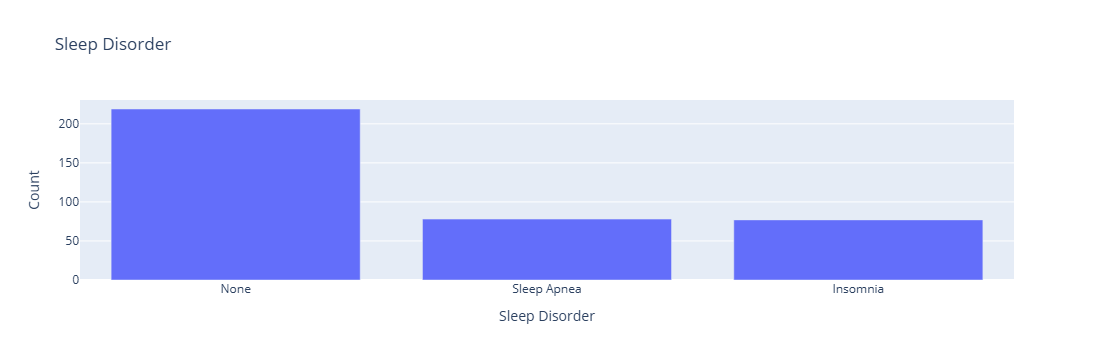

In [17]:
fig = go.Figure(data=[go.Bar(x=df['Sleep Disorder'].value_counts().index,
                             y=df['Sleep Disorder'].value_counts())])
fig.update_layout(
 title= 'Sleep Disorder',
 xaxis_title="Sleep Disorder",
 yaxis_title="Count"
 )
fig.show()

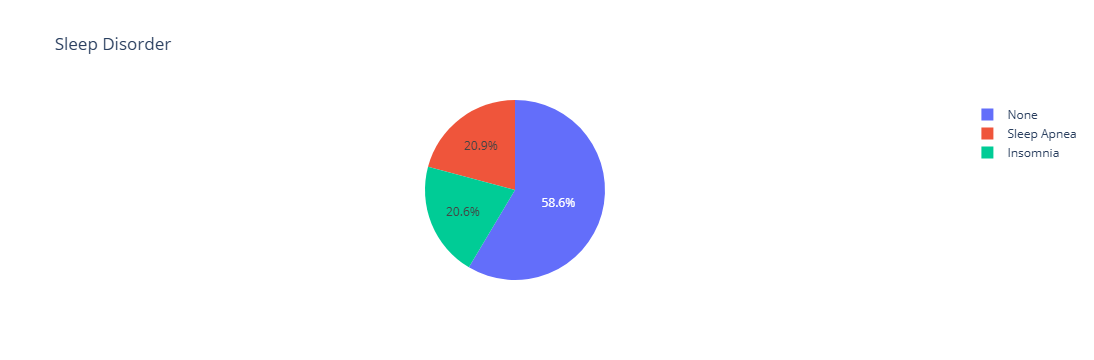

In [18]:
fig = go.Figure(data=[go.Pie(labels=df['Sleep Disorder'].value_counts().index,
                             values=df['Sleep Disorder'].value_counts())])
fig.update_layout(title= 'Sleep Disorder')
fig.show()

In [19]:
df['Gender'].value_counts()

Gender
Male      189
Female    185
Name: count, dtype: int64

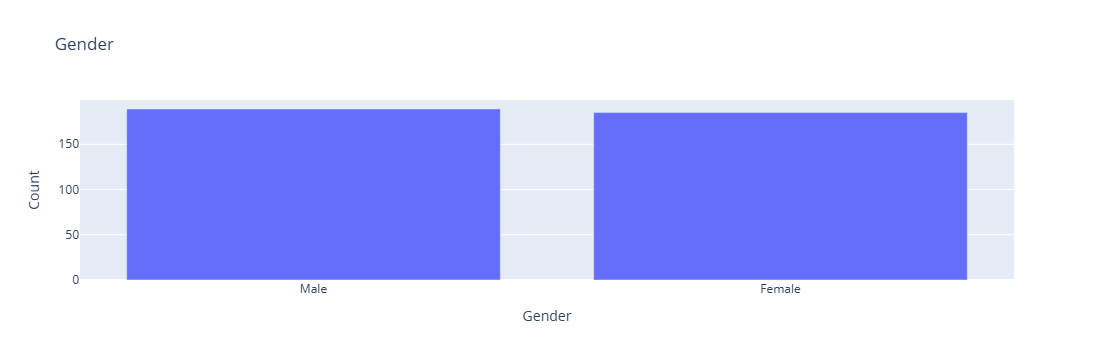

In [20]:
fig = go.Figure(data = [go.Bar(x = df['Gender'].value_counts().index,
                              y = df['Gender'].value_counts())])
fig.update_layout(
    title = 'Gender',
    xaxis_title = 'Gender',
    yaxis_title = 'Count'
)
fig.show()


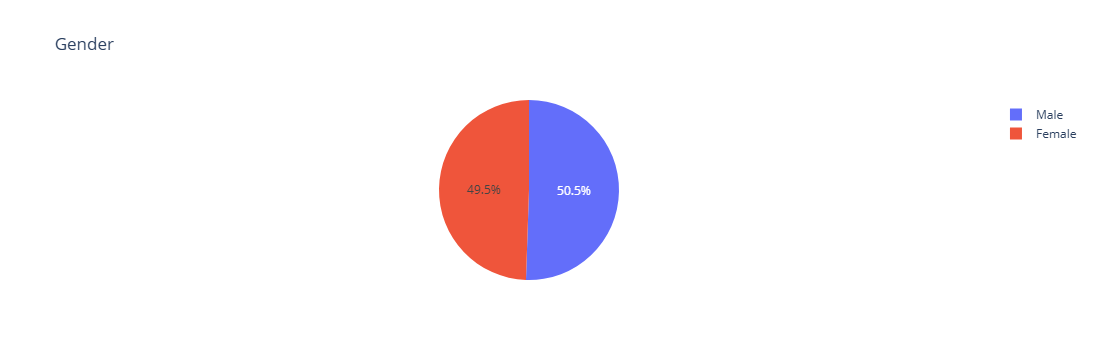

In [21]:
counts = df['Gender'].value_counts()
fig = go.Figure(data=[go.Pie(labels=counts.index, values=counts)])
fig.update_layout(title= 'Gender')
fig.show()

In [22]:
df['Occupation'].value_counts()

Occupation
Nurse                   73
Doctor                  71
Engineer                63
Lawyer                  47
Teacher                 40
Accountant              37
Salesperson             32
Software Engineer        4
Scientist                4
Sales Representative     2
Manager                  1
Name: count, dtype: int64

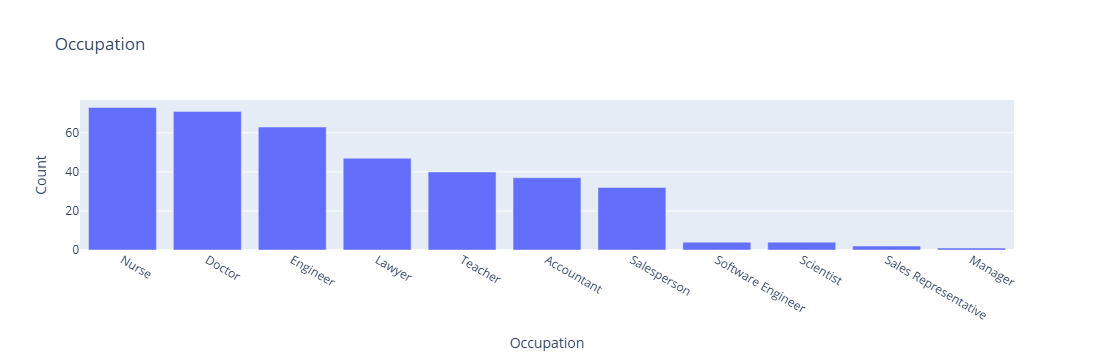

In [23]:
fig = go.Figure(data=[go.Bar(x=df['Occupation'].value_counts().index, y=df['Occupation'].value_counts())])
fig.update_layout(
 title= 'Occupation',
 xaxis_title="Occupation",
 yaxis_title="Count"
 )
fig.show()

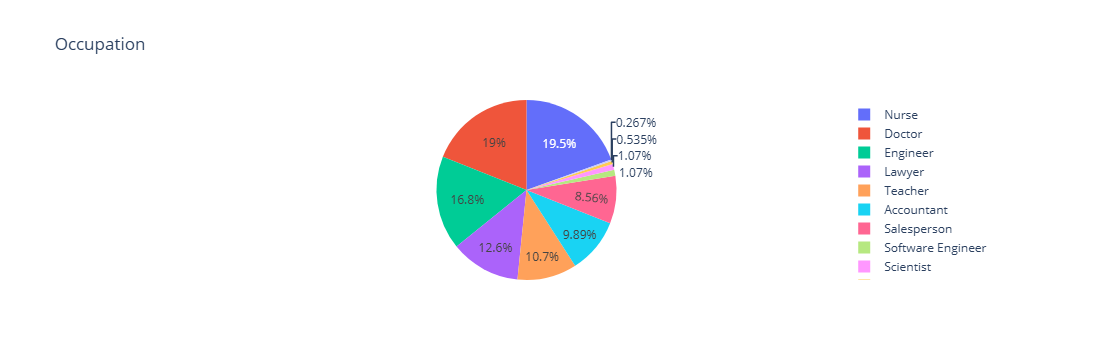

In [24]:
counts = df['Occupation'].value_counts()
fig = go.Figure(data=[go.Pie(labels=counts.index, values=counts)])
fig.update_layout(title= 'Occupation')
fig.show()

In [25]:
df['BMI Category'].value_counts()

BMI Category
Normal           195
Overweight       148
Normal Weight     21
Obese             10
Name: count, dtype: int64

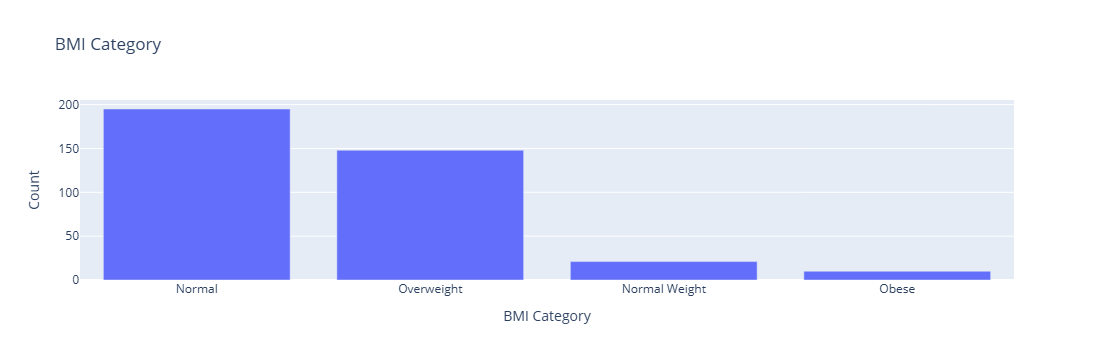

In [26]:
fig = go.Figure(data=[go.Bar(x=df['BMI Category'].value_counts().index, y=df['BMI Category'].value_counts())])
fig.update_layout(
 title= 'BMI Category',
 xaxis_title="BMI Category",
 yaxis_title="Count"
 )
fig.show()

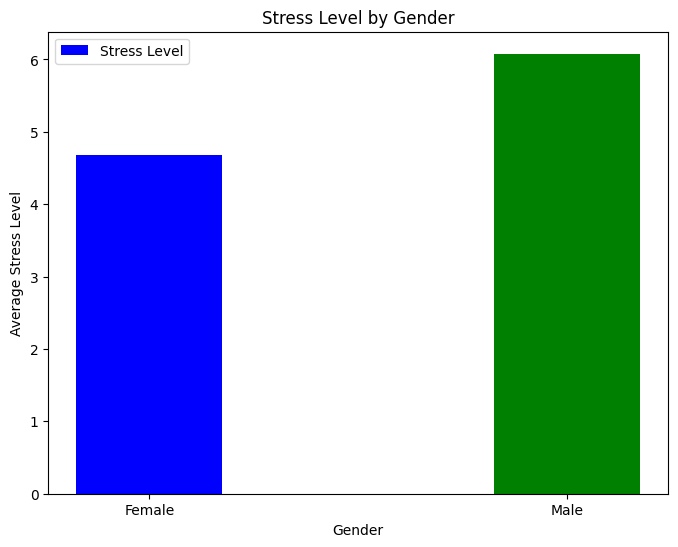

In [27]:
gender_stress = df.groupby('Gender')['Stress Level'].mean()
x = np.arange(len(gender_stress))
width = 0.35
plt.figure(figsize=(8, 6))
plt.bar(x, gender_stress, width, label='Stress Level', color=['blue', 'green'])
plt.xlabel('Gender')
plt.ylabel('Average Stress Level')
plt.title('Stress Level by Gender')
plt.xticks(x, gender_stress.index)
plt.legend()
plt.show()

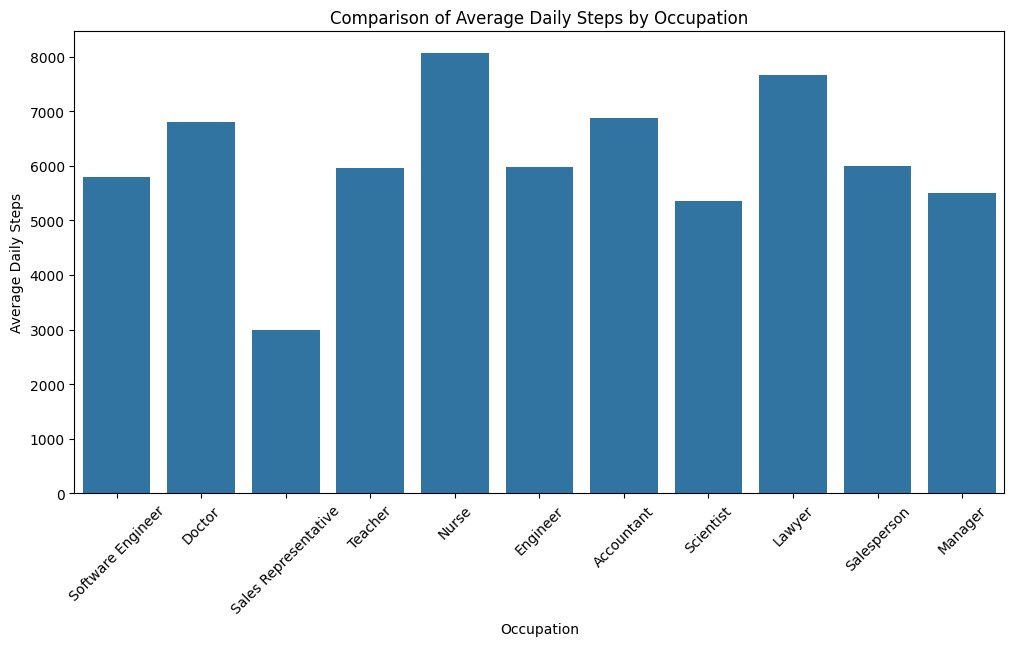

In [28]:
plt.figure(figsize=(12, 6))
sns.barplot(x="Occupation", y="Daily Steps", data=df, ci=None)
plt.title("Comparison of Average Daily Steps by Occupation")
plt.xlabel("Occupation")
plt.ylabel("Average Daily Steps")
plt.xticks(rotation=45)
plt.show()

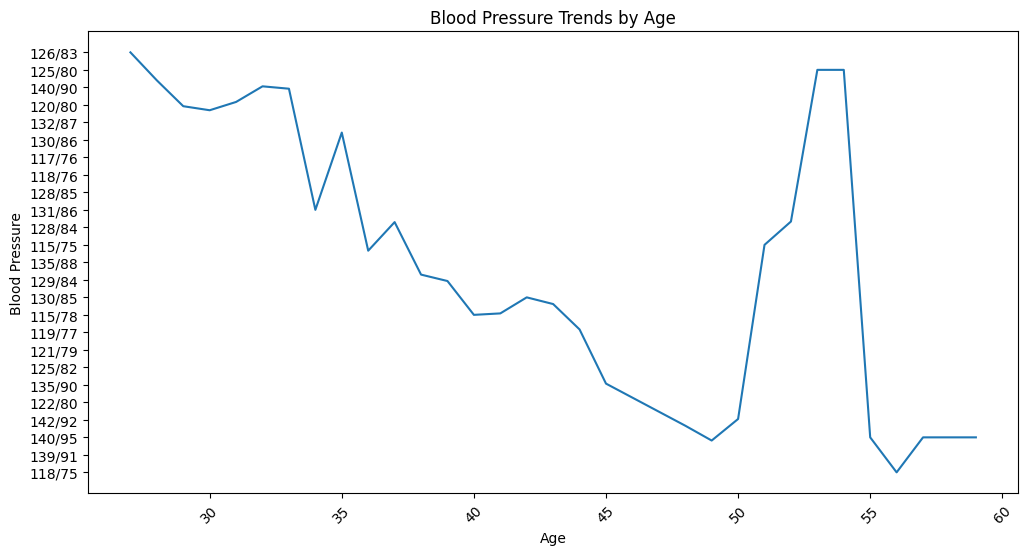

In [29]:
plt.figure(figsize=(12, 6))
sns.lineplot(x="Age", y="Blood Pressure", data=df, ci=None)
plt.title("Blood Pressure Trends by Age")
plt.xlabel("Age")
plt.ylabel("Blood Pressure")
plt.xticks(rotation=45)
plt.show()

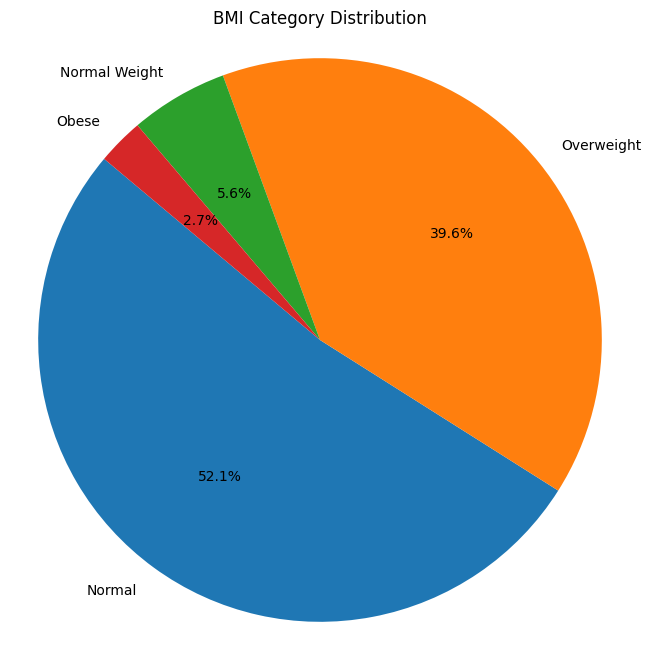

In [30]:
bmi_counts = df['BMI Category'].value_counts()

plt.figure(figsize=(8, 8))
plt.pie(bmi_counts, labels=bmi_counts.index, autopct='%1.1f%%', startangle=140)
plt.title("BMI Category Distribution")
plt.axis('equal')  # Equal aspect ratio ensures that the pie chart is circular.
plt.show()

In [31]:
df[['Systolic', 'Diastolic']] = df['Blood Pressure'].str.split('/', expand=True).astype(int)

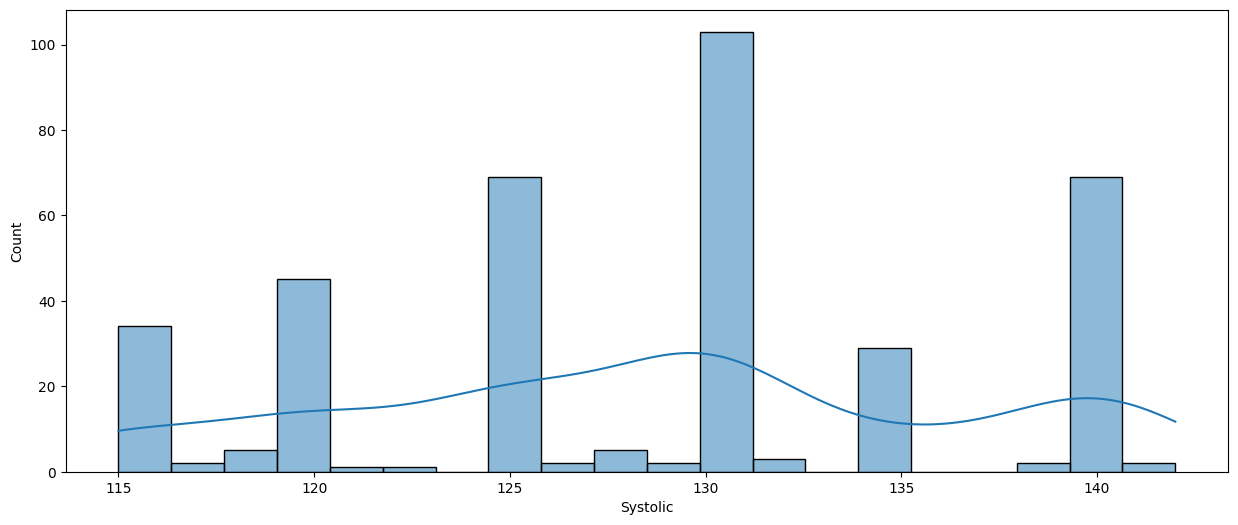

In [32]:
plt.figure(figsize=(15,6))
sns.histplot(df['Systolic'], kde = True, bins = 20, palette = 'hls')
plt.xticks(rotation = 0)
plt.show()

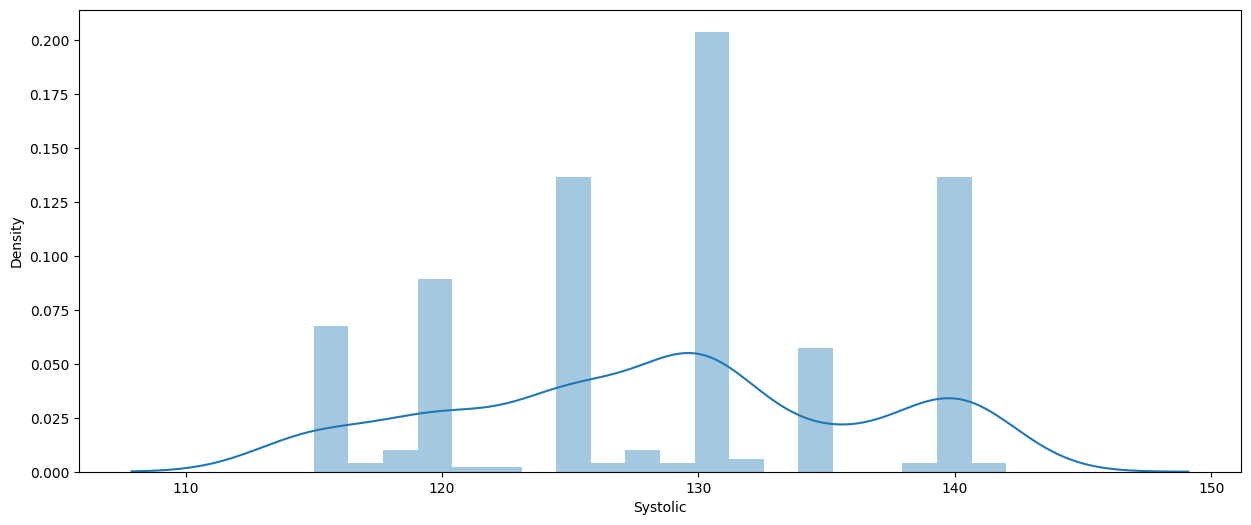

In [33]:
plt.figure(figsize=(15,6))
sns.distplot(df['Systolic'], kde = True, bins = 20)
plt.xticks(rotation = 0)
plt.show()

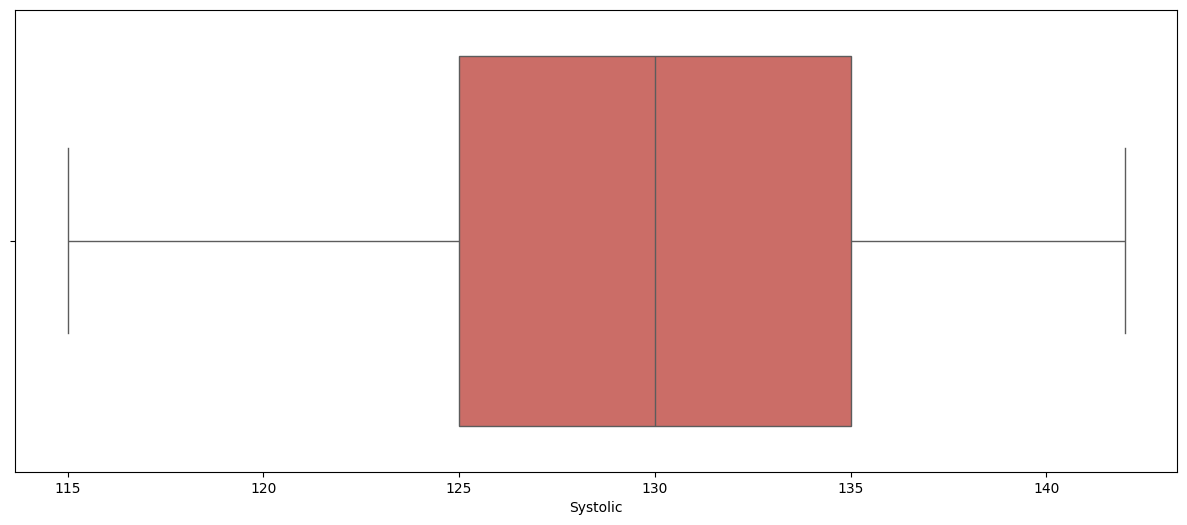

In [34]:
plt.figure(figsize=(15,6))
sns.boxplot(x = 'Systolic', data=df, palette = 'hls')
plt.xticks(rotation = 0)
plt.show()

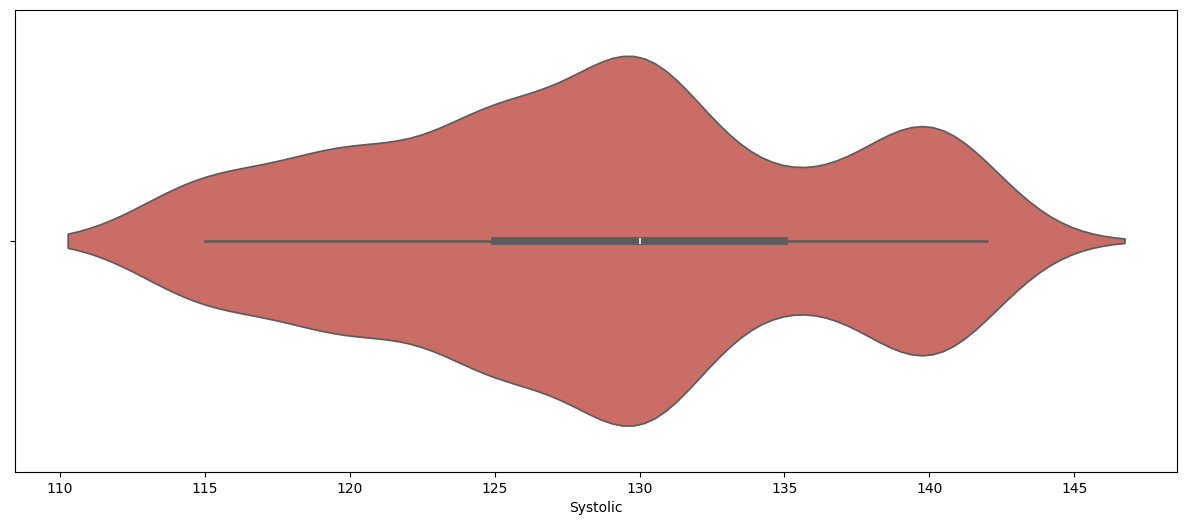

In [35]:
plt.figure(figsize=(15,6))
sns.violinplot(x = 'Systolic', data=df, palette = 'hls')
plt.xticks(rotation = 0)
plt.show()

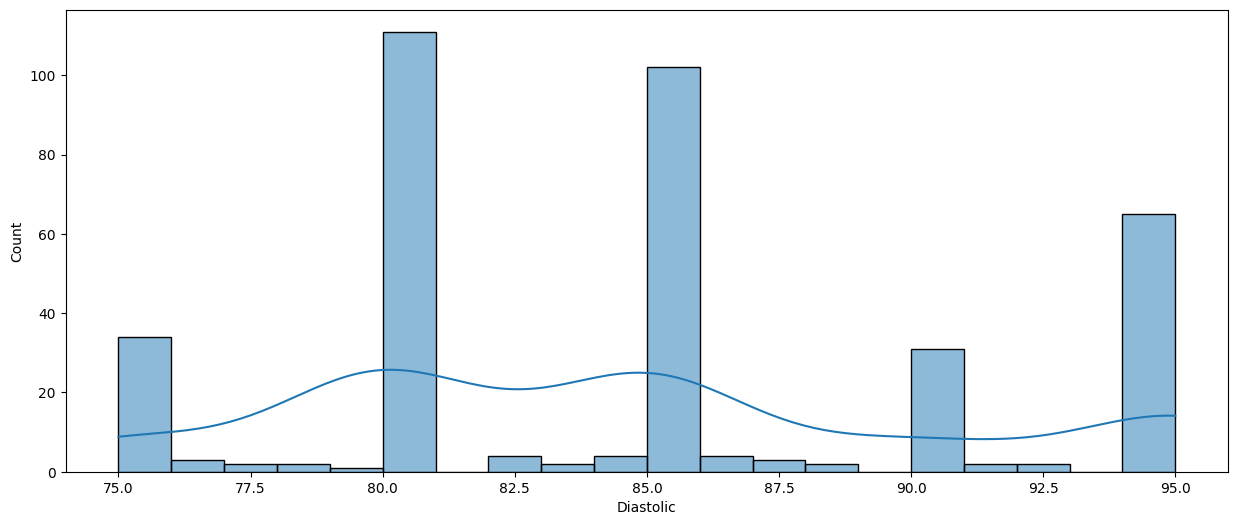

In [36]:
plt.figure(figsize=(15,6))
sns.histplot(df['Diastolic'], kde = True, bins = 20, palette = 'hls')
plt.xticks(rotation = 0)
plt.show()

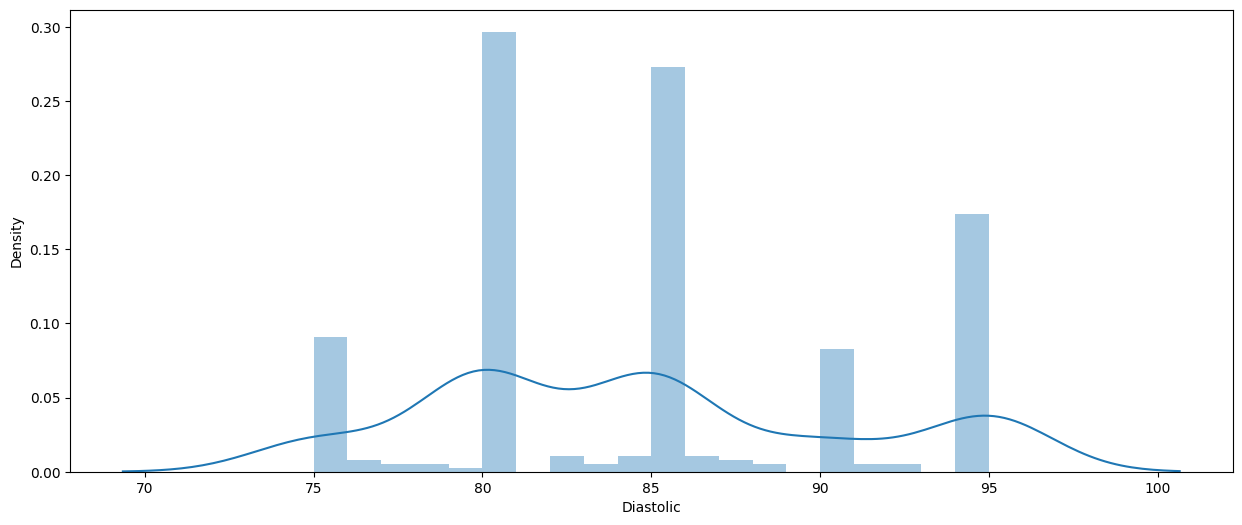

In [37]:
plt.figure(figsize=(15,6))
sns.distplot(df['Diastolic'], kde = True, bins = 20)
plt.xticks(rotation = 0)
plt.show()

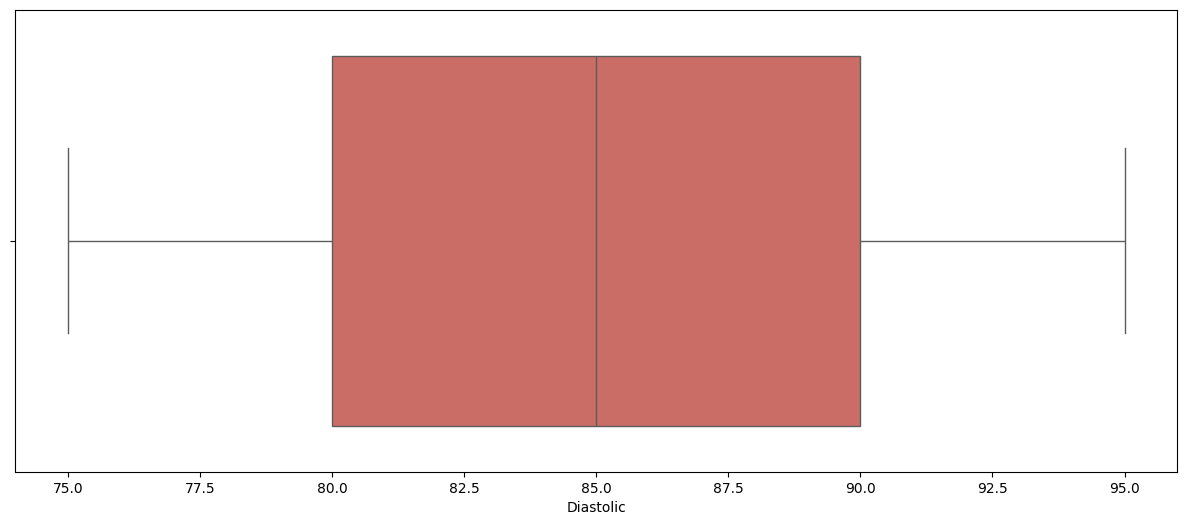

In [38]:
plt.figure(figsize=(15,6))
sns.boxplot(x = 'Diastolic', data=df, palette = 'hls')
plt.xticks(rotation = 0)
plt.show()

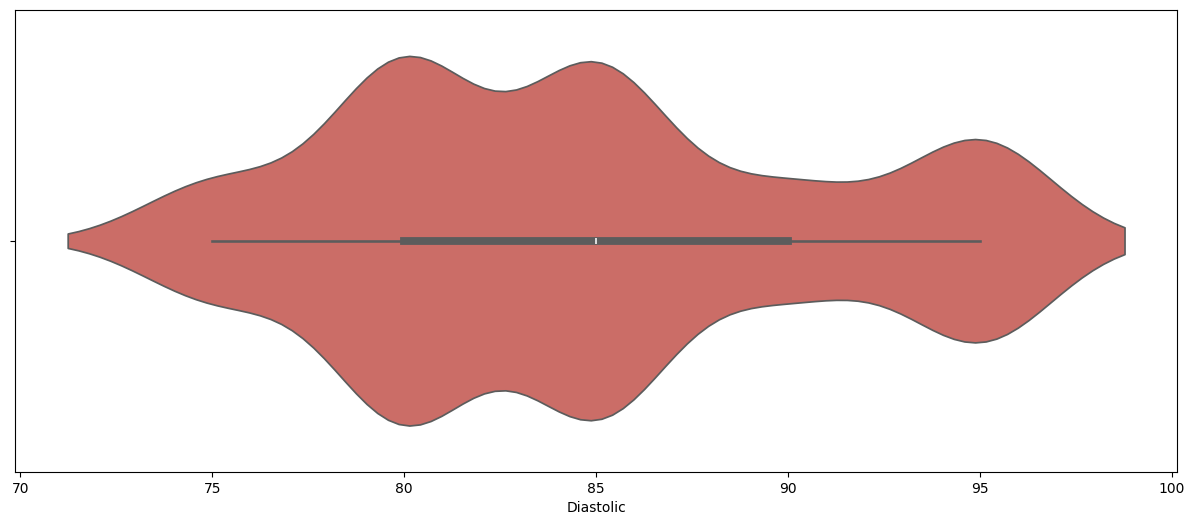

In [39]:
plt.figure(figsize=(15,6))
sns.violinplot(x = 'Diastolic', data=df, palette = 'hls')
plt.xticks(rotation = 0)
plt.show()

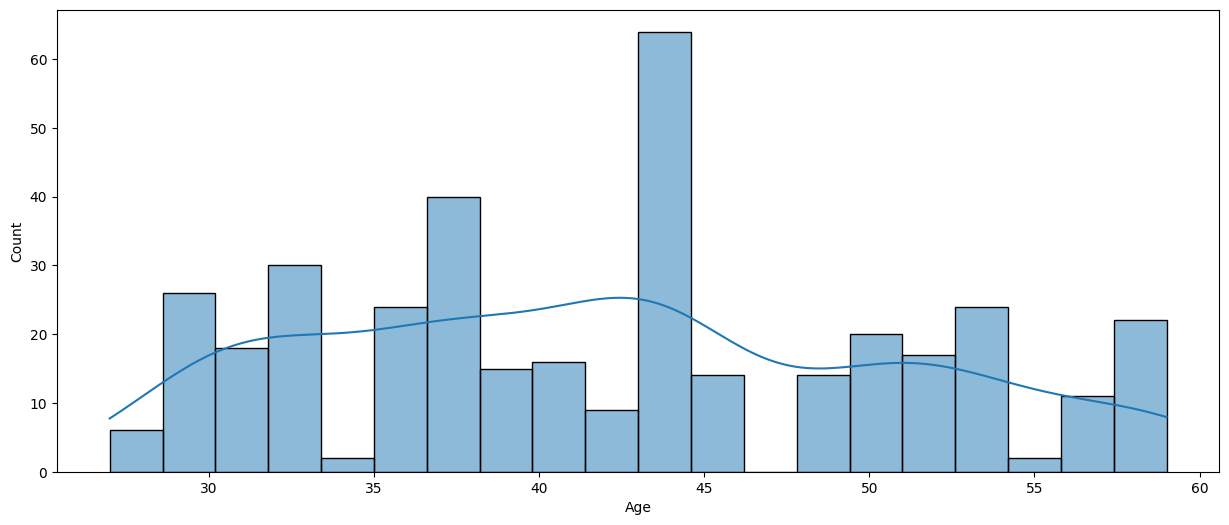

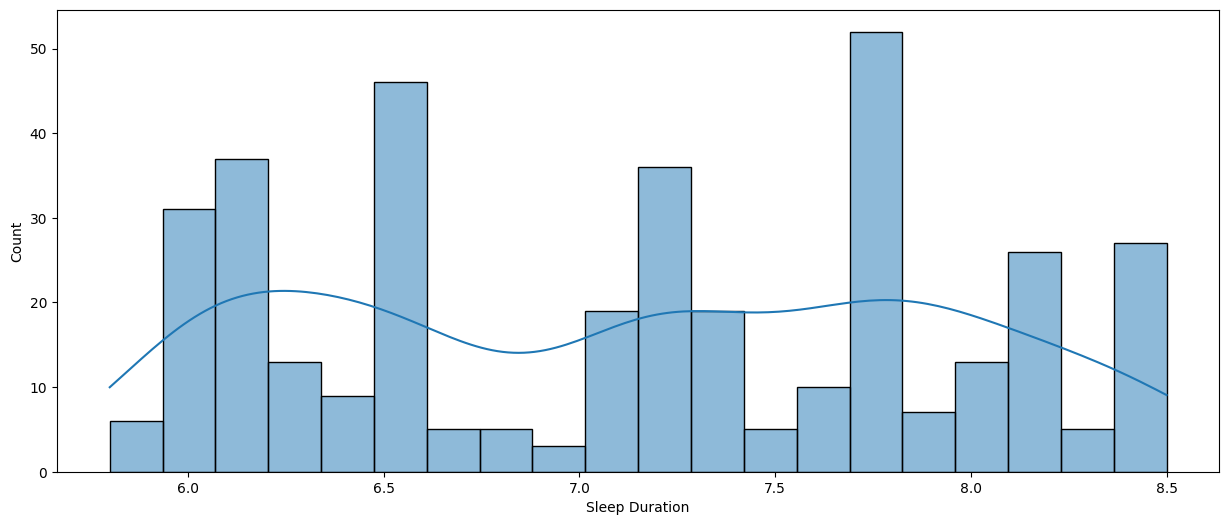

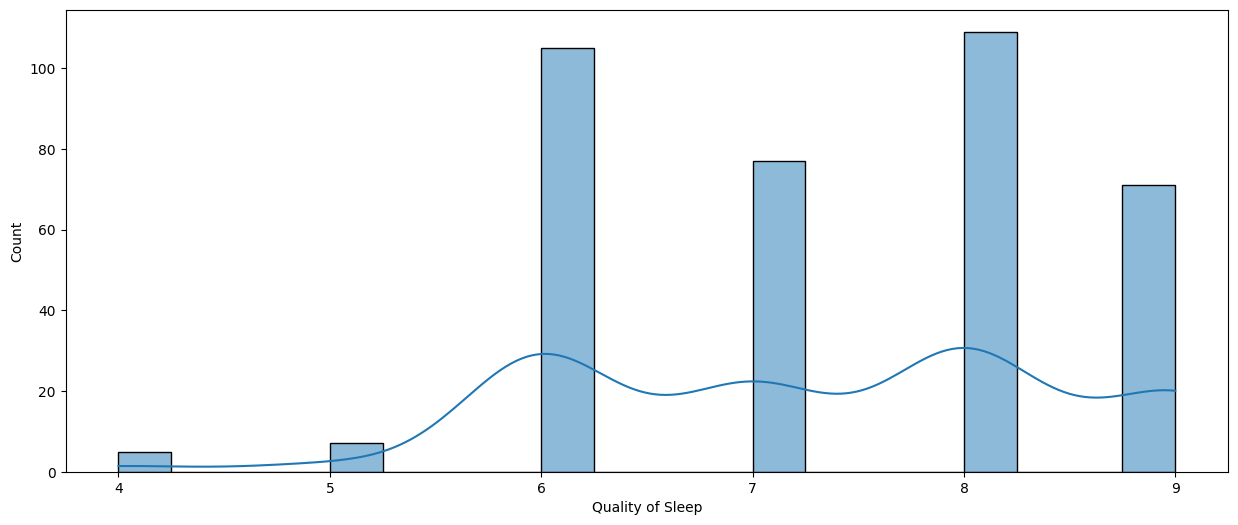

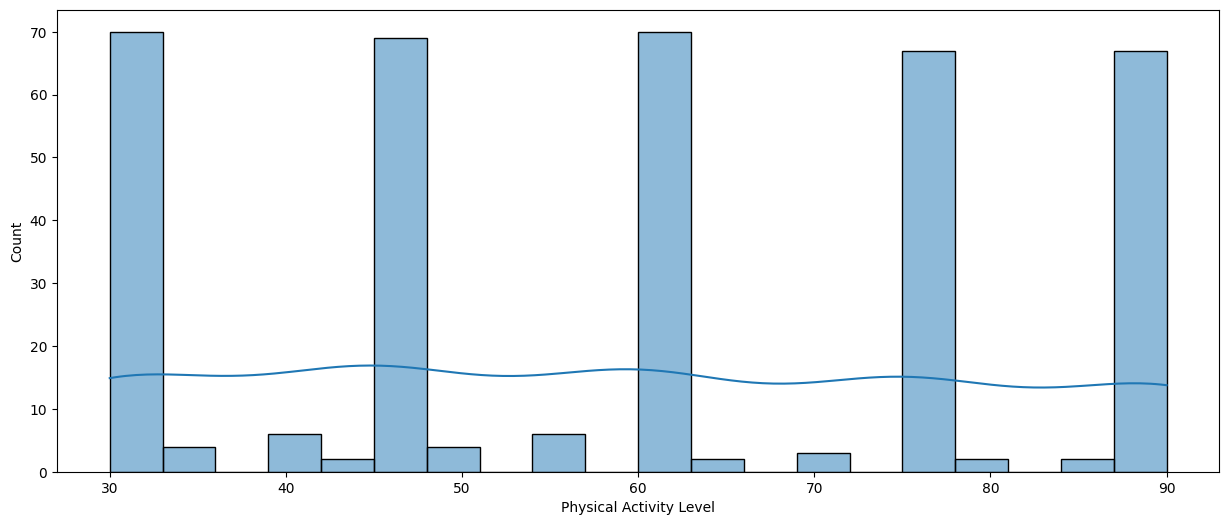

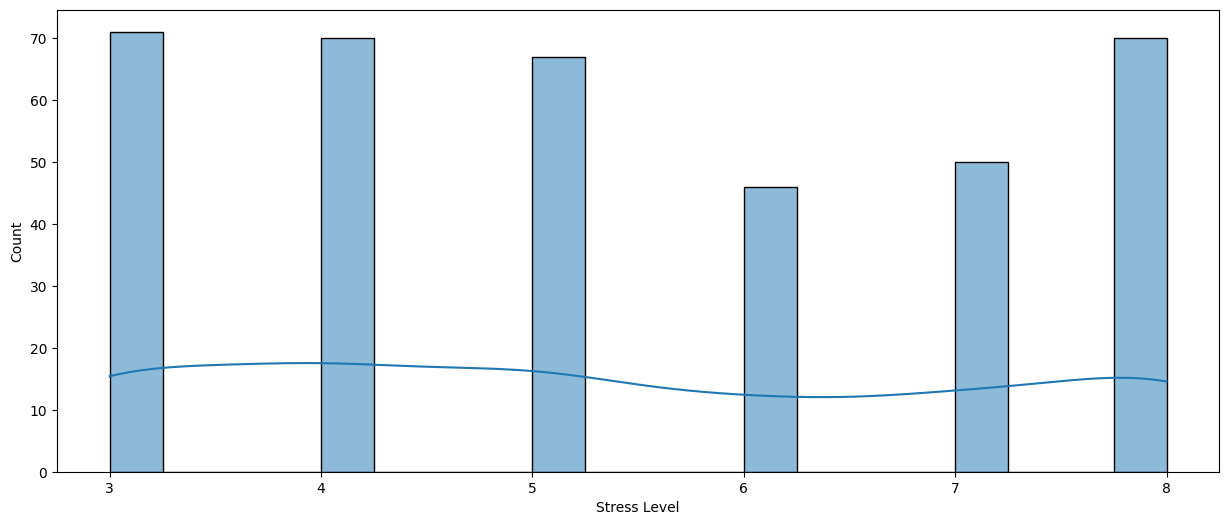

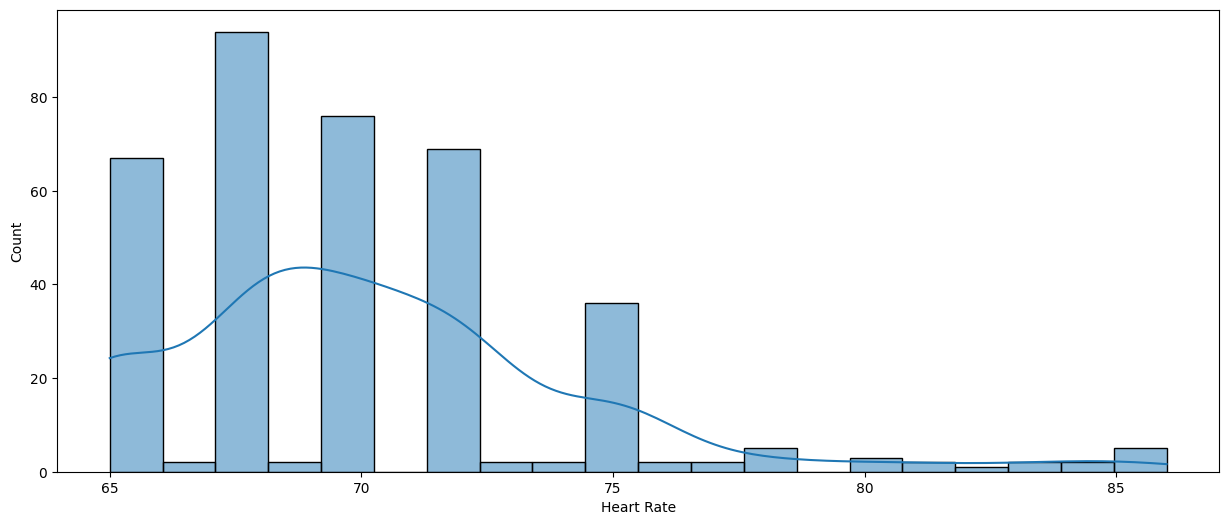

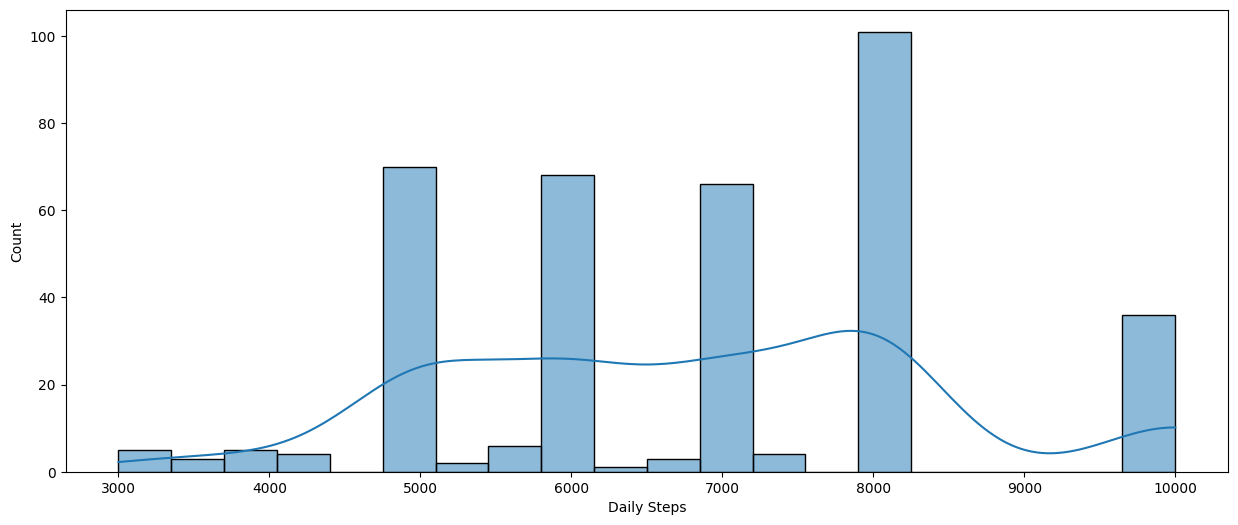

In [40]:
for i in numerical_columns:
    if i != 'Person ID':
        plt.figure(figsize=(15,6))
        sns.histplot(df[i], kde = True, bins = 20, palette = 'hls')
        plt.xticks(rotation = 0)
        plt.show()

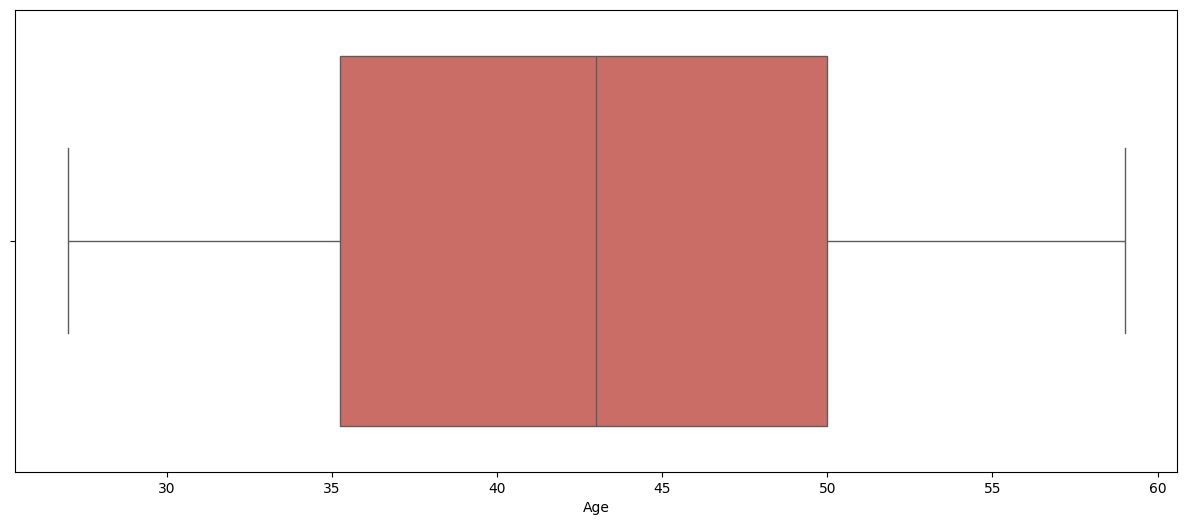

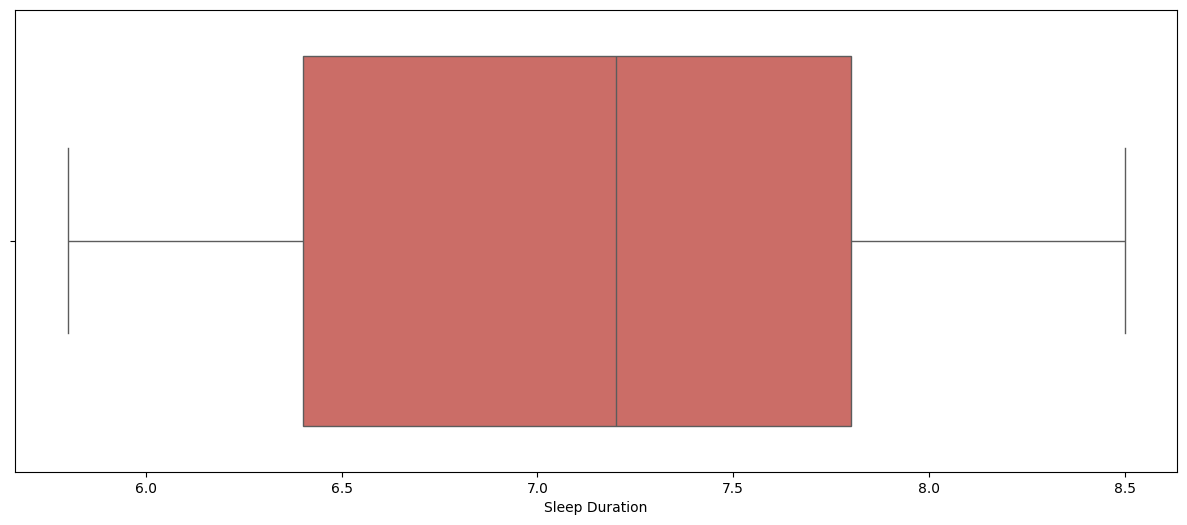

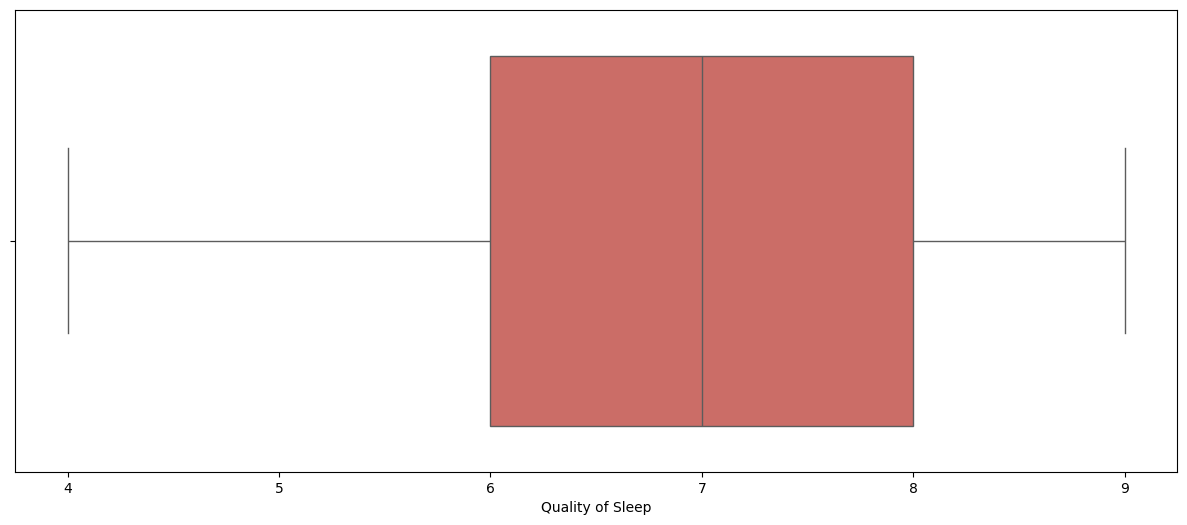

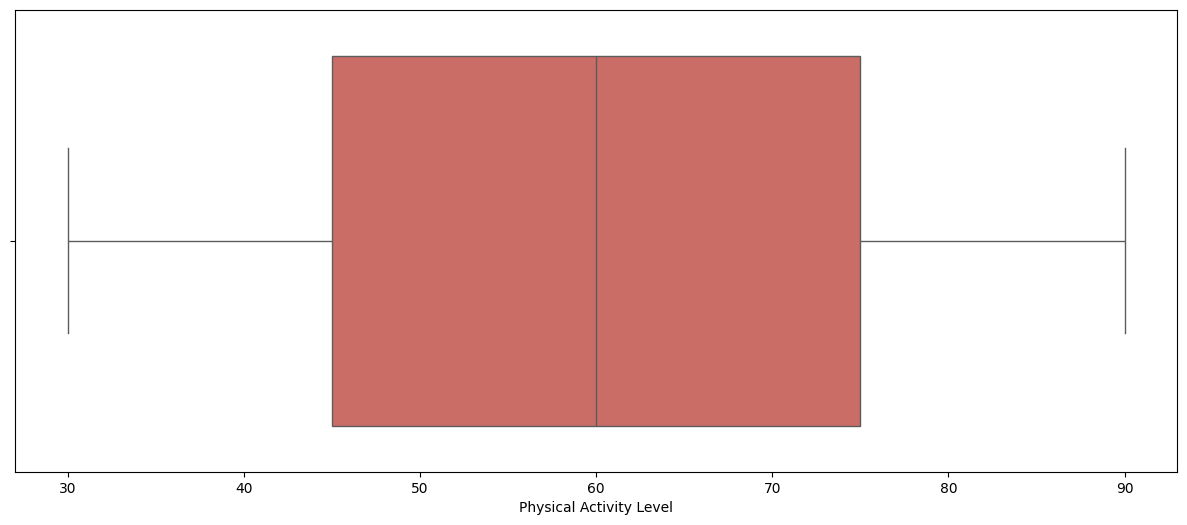

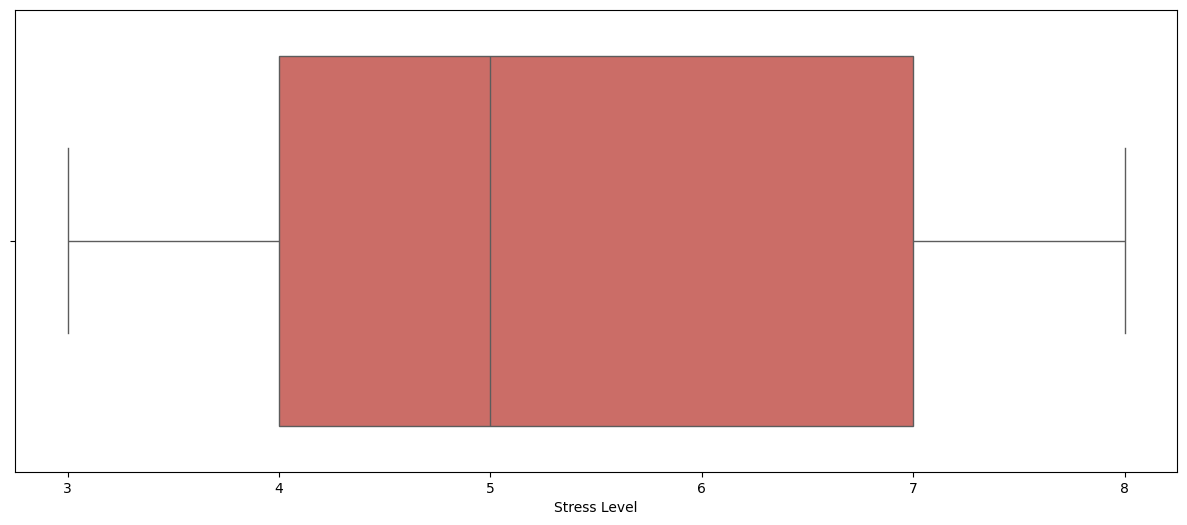

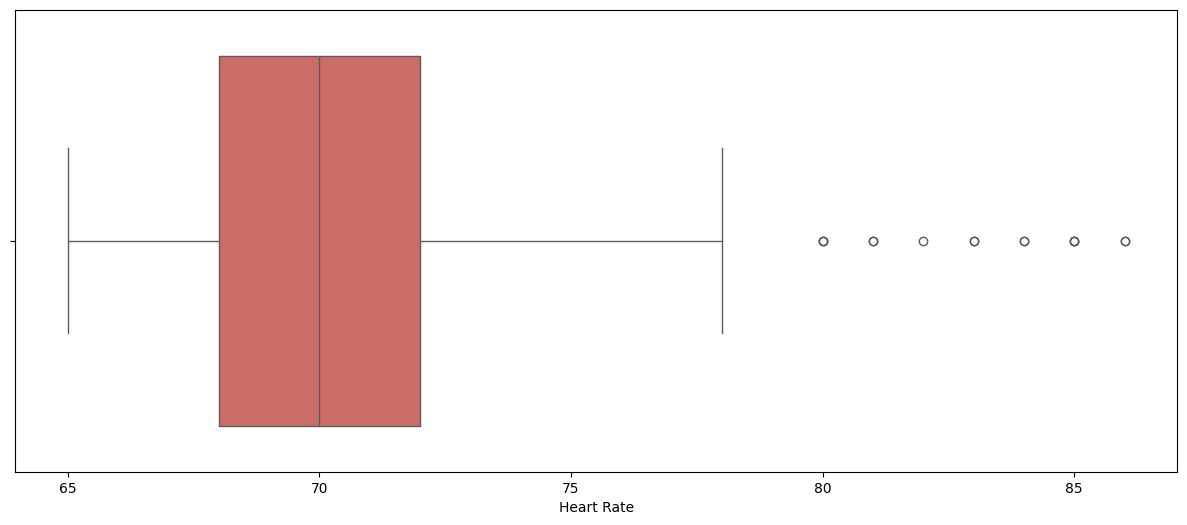

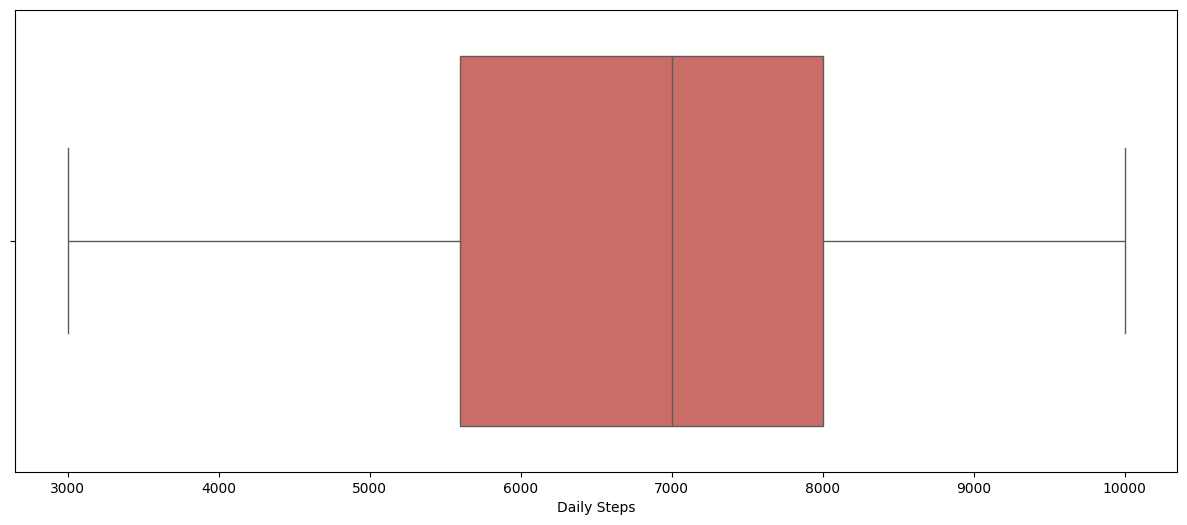

In [41]:
for i in numerical_columns:
    if i != 'Person ID':
        plt.figure(figsize=(15,6))
        sns.boxplot(x = i, data = df, palette = 'hls')
        plt.xticks(rotation = 0)
        plt.show()

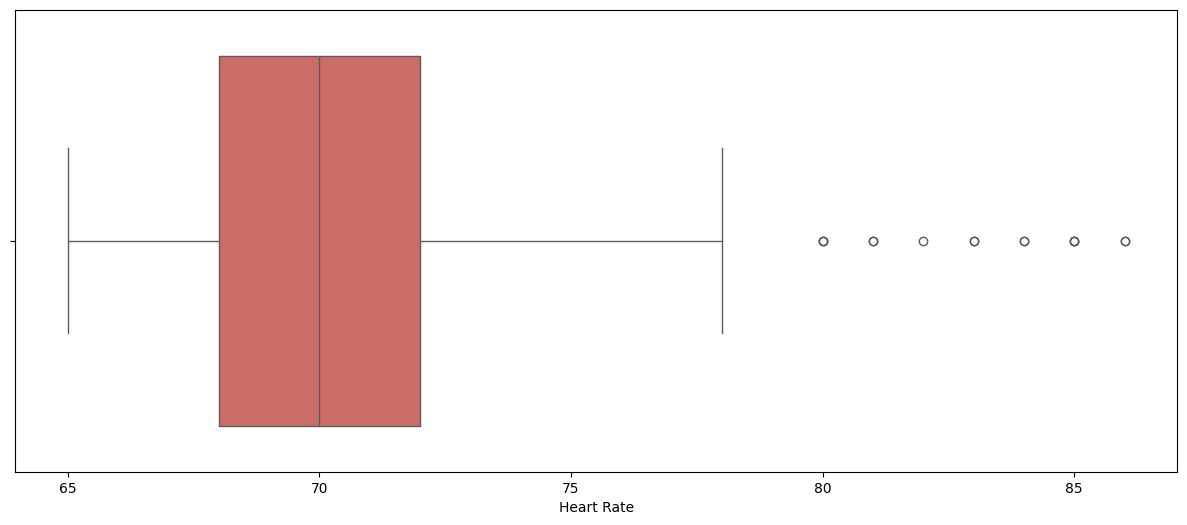

In [42]:
plt.figure(figsize=(15,6))
sns.boxplot(x = 'Heart Rate', data = df, palette = 'hls')
plt.xticks(rotation = 0)
plt.show()

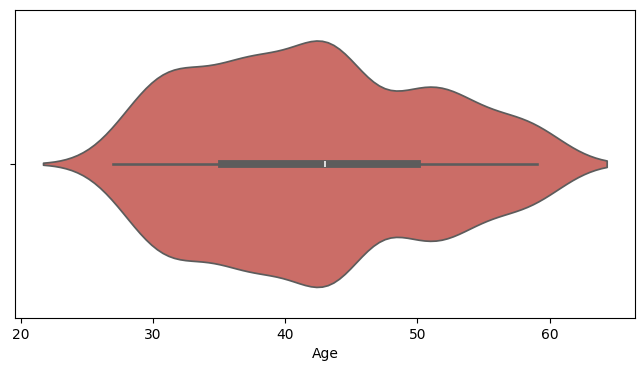

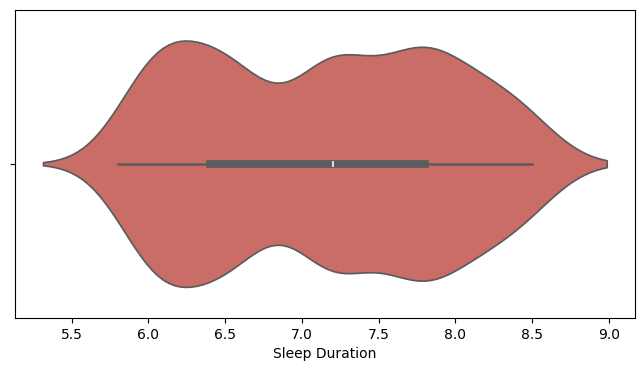

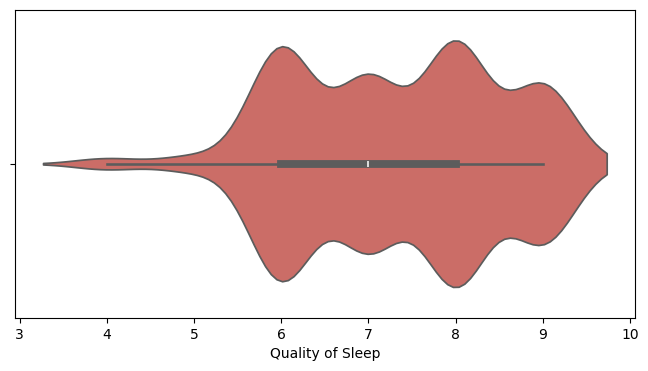

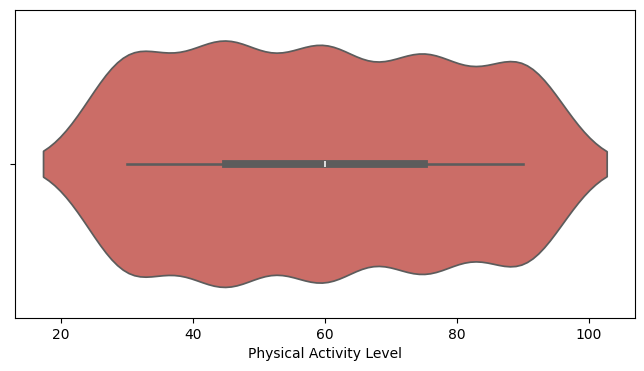

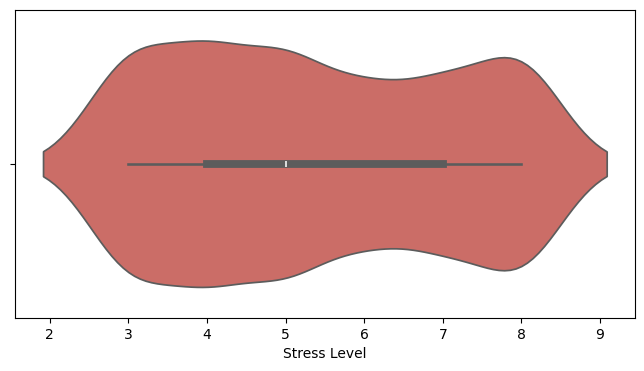

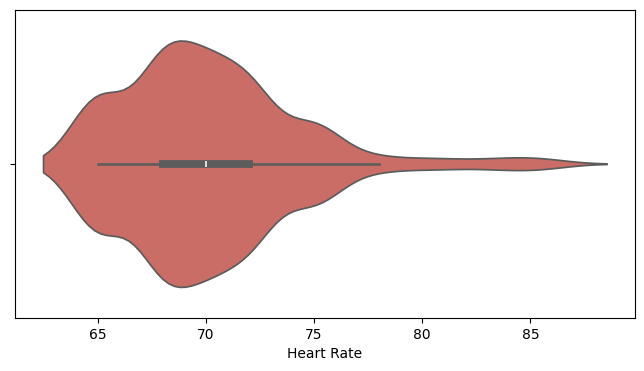

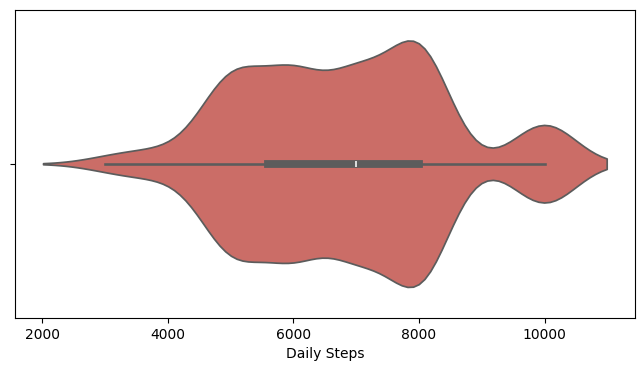

In [43]:
for i in numerical_columns:
    if i != 'Person ID':
        plt.figure(figsize=(8,4))
        sns.violinplot(x = i, data = df, palette = 'hls')
        plt.xticks(rotation = 0)
        plt.show()

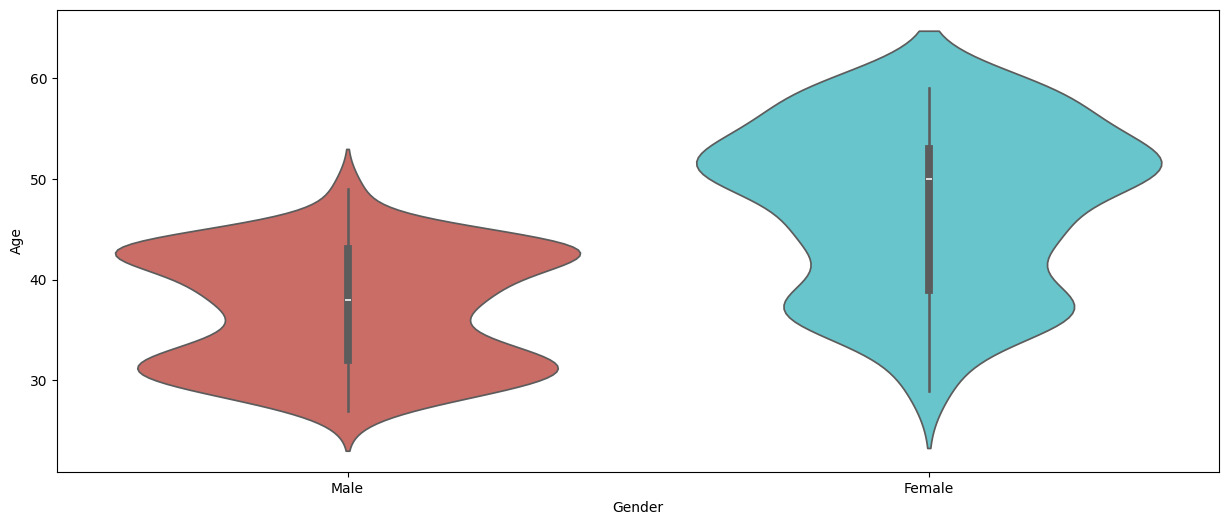

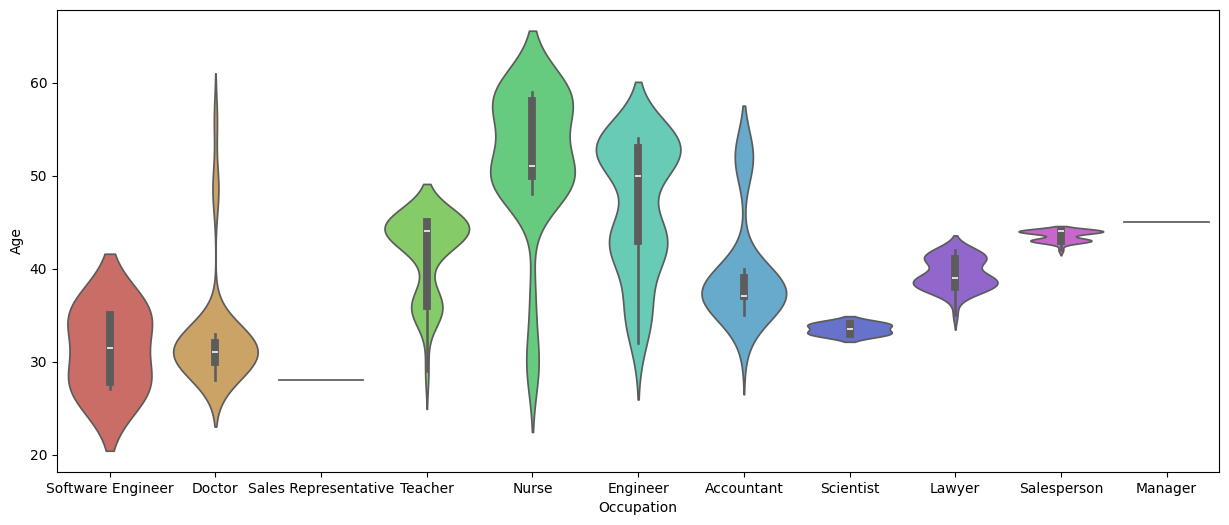

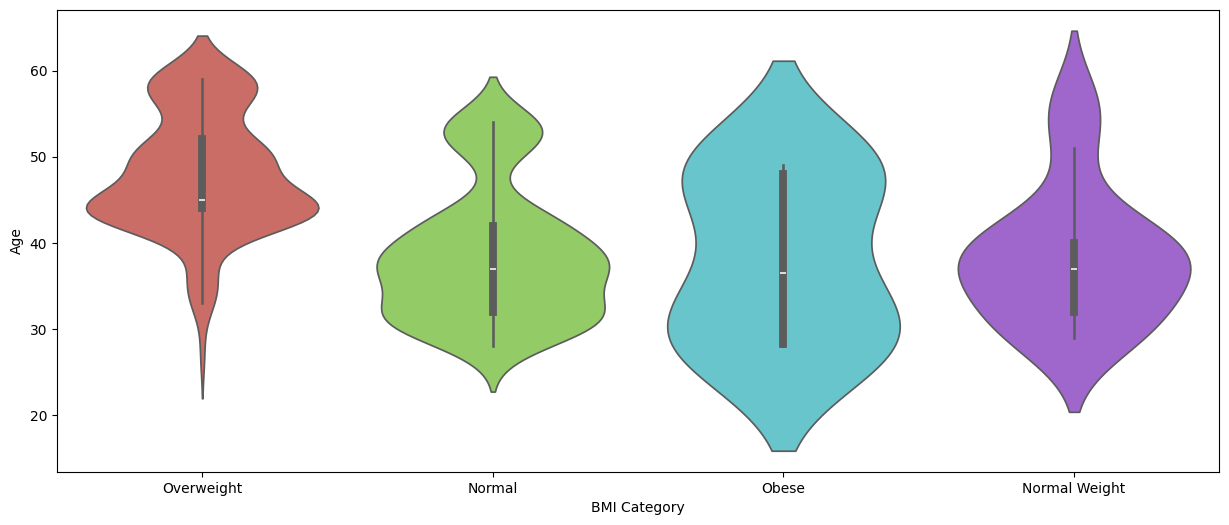

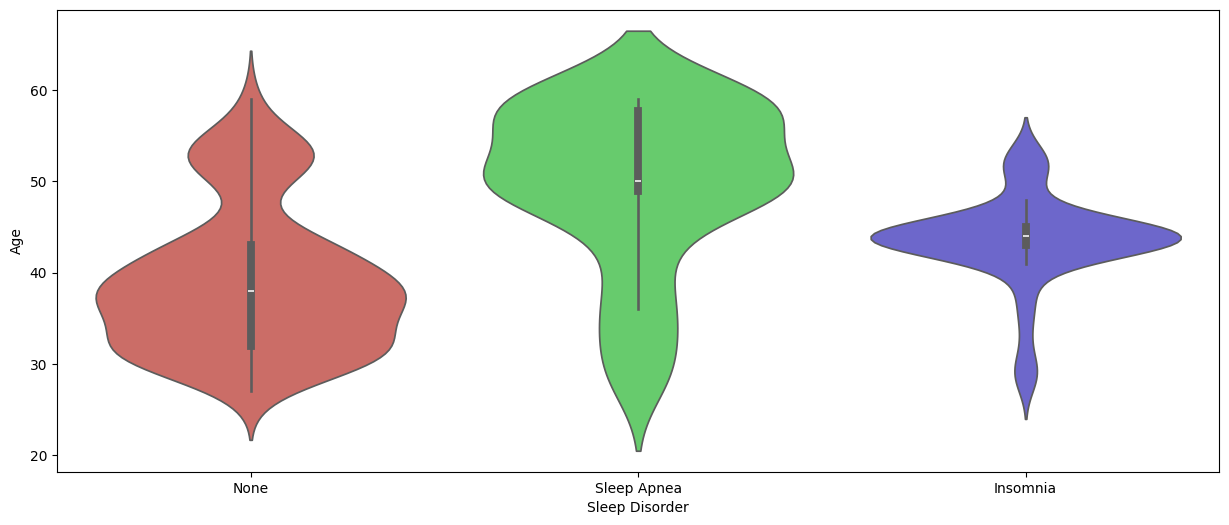

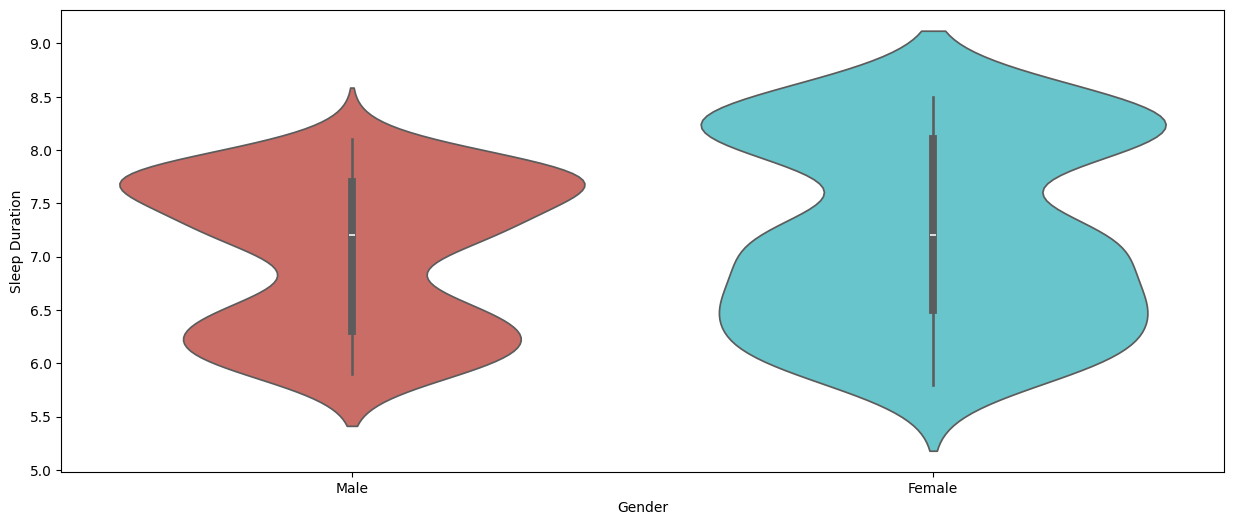

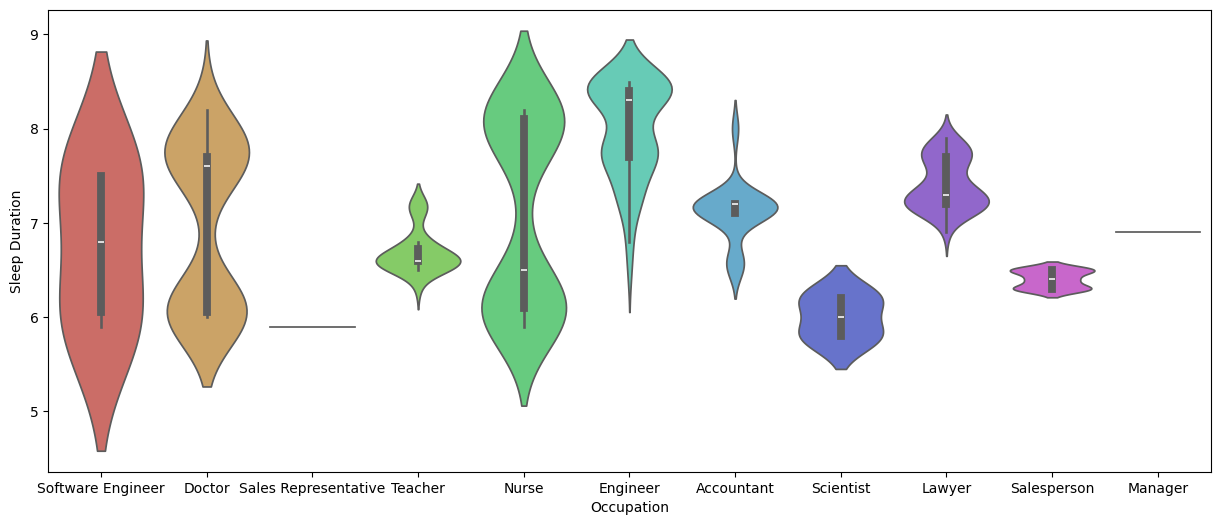

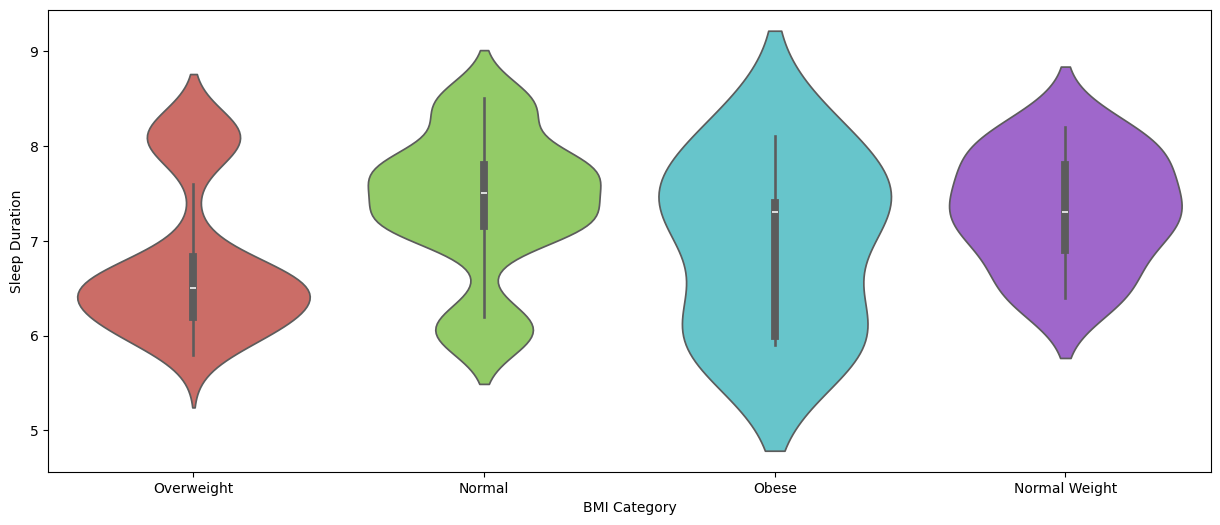

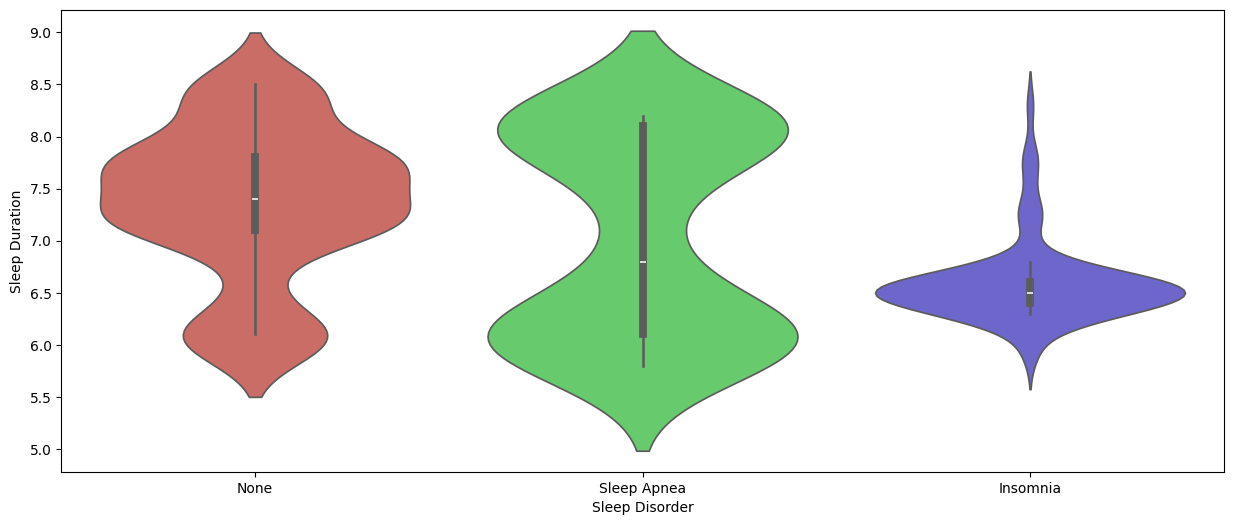

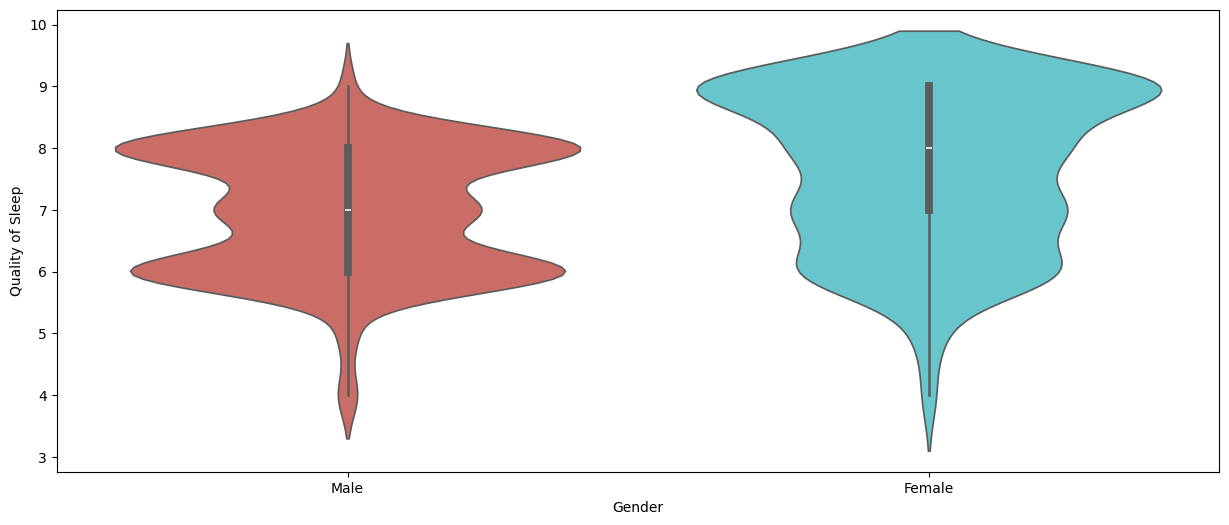

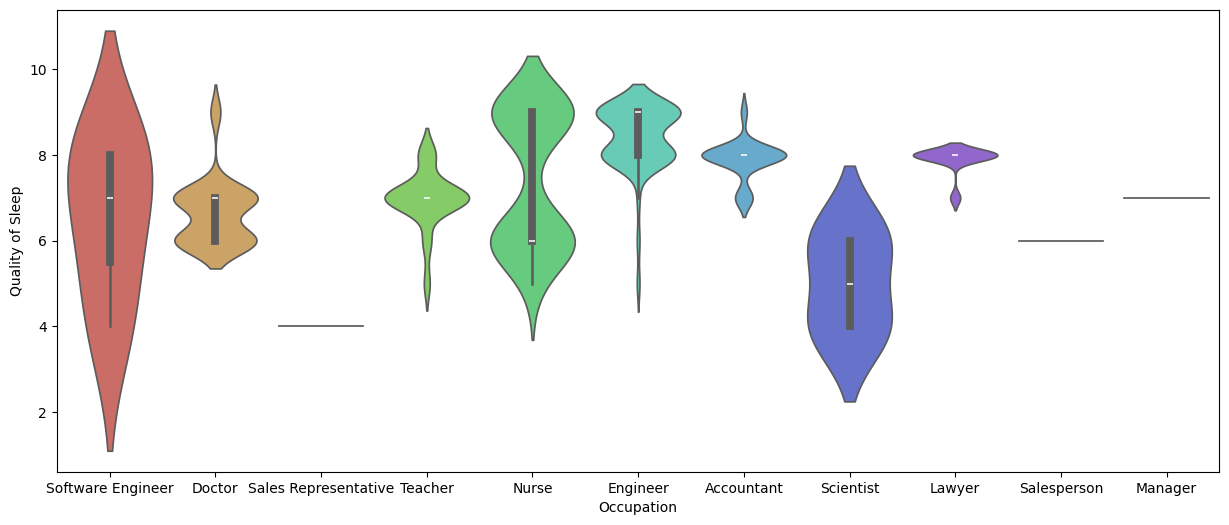

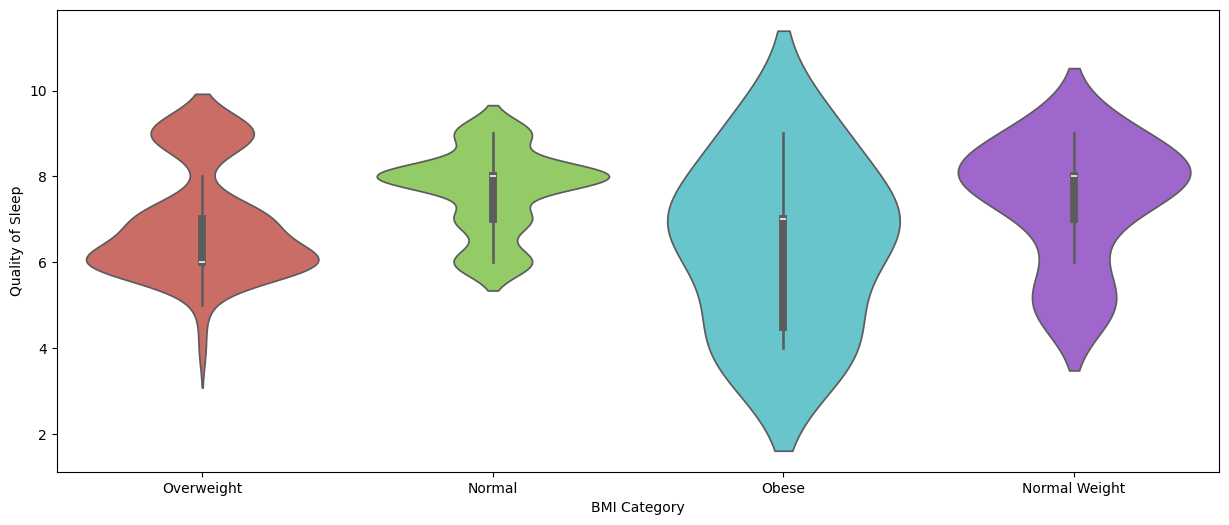

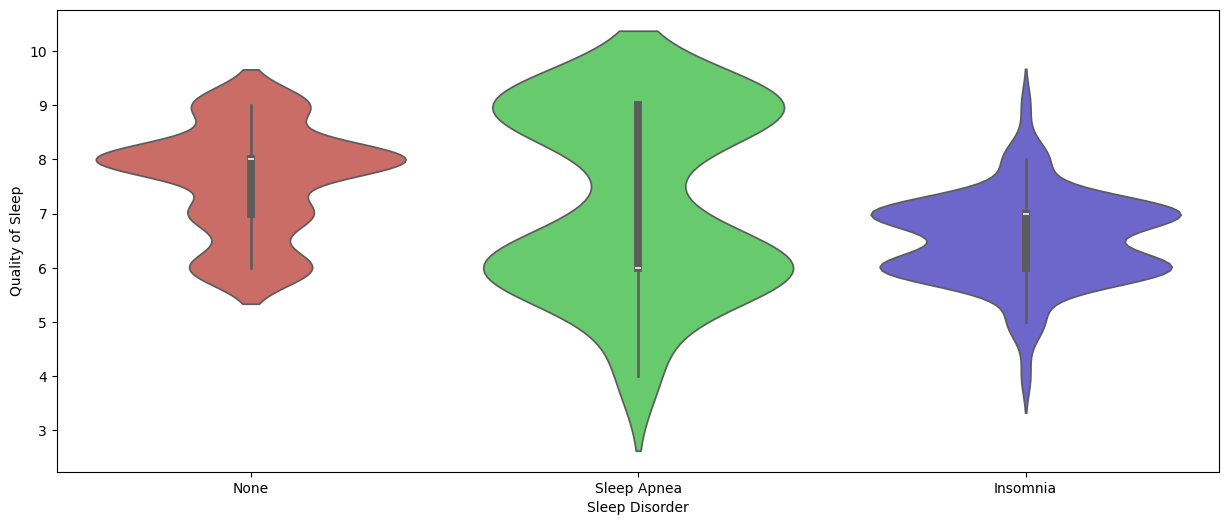

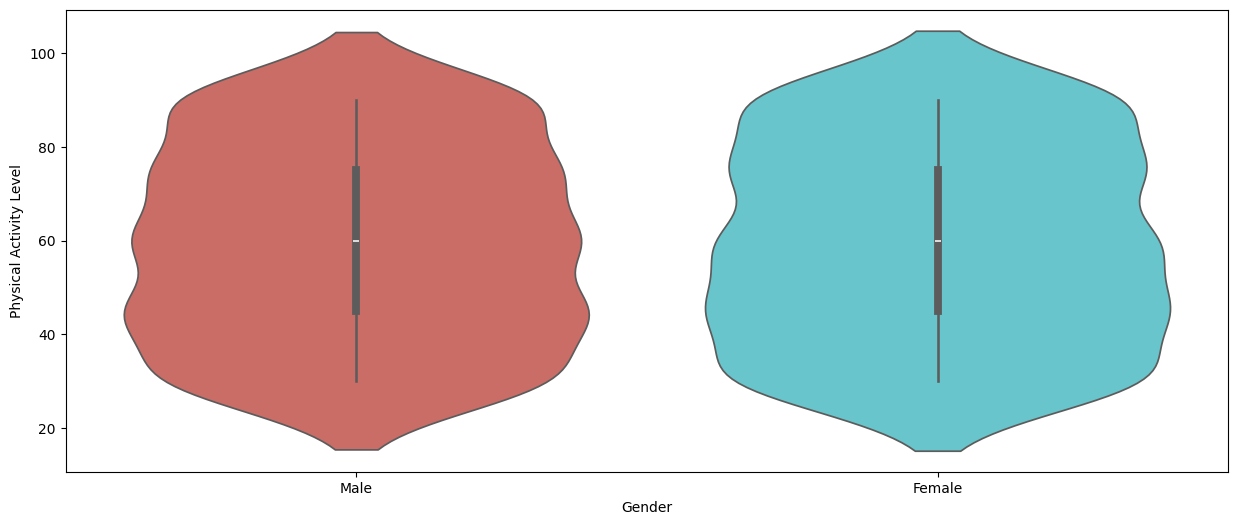

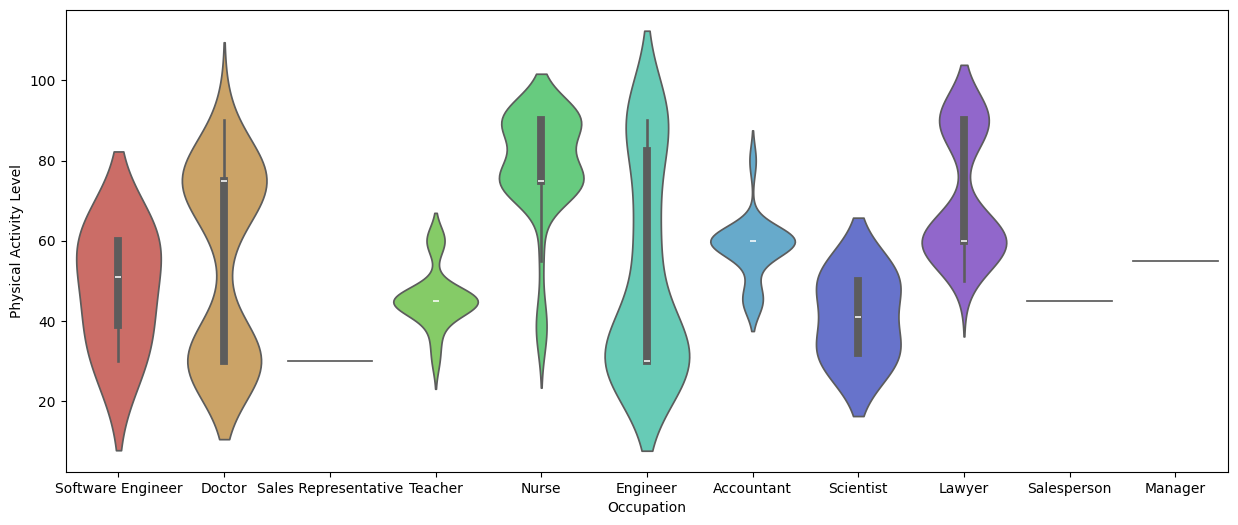

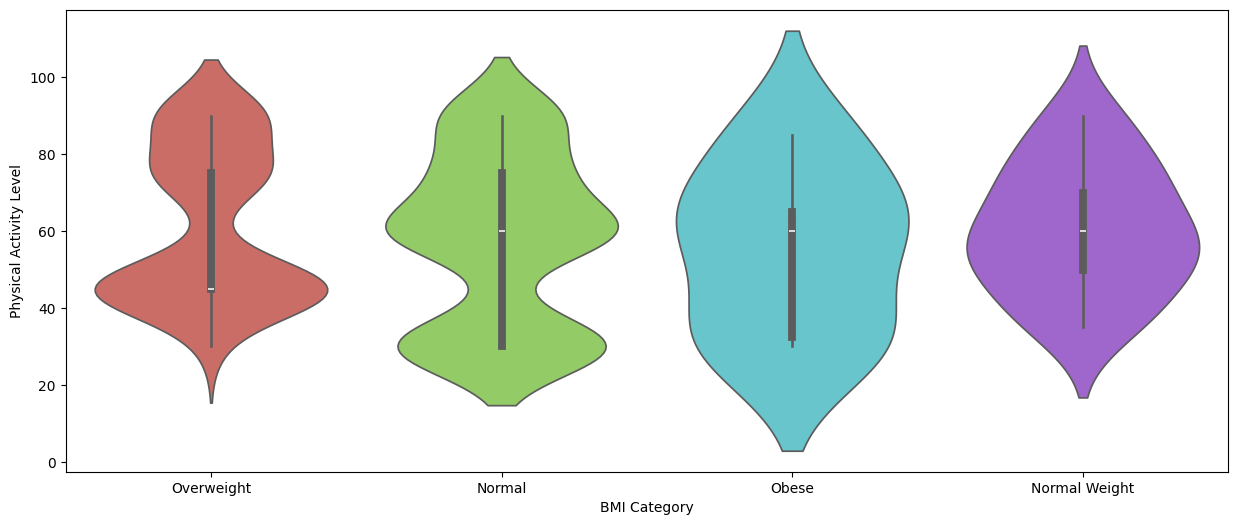

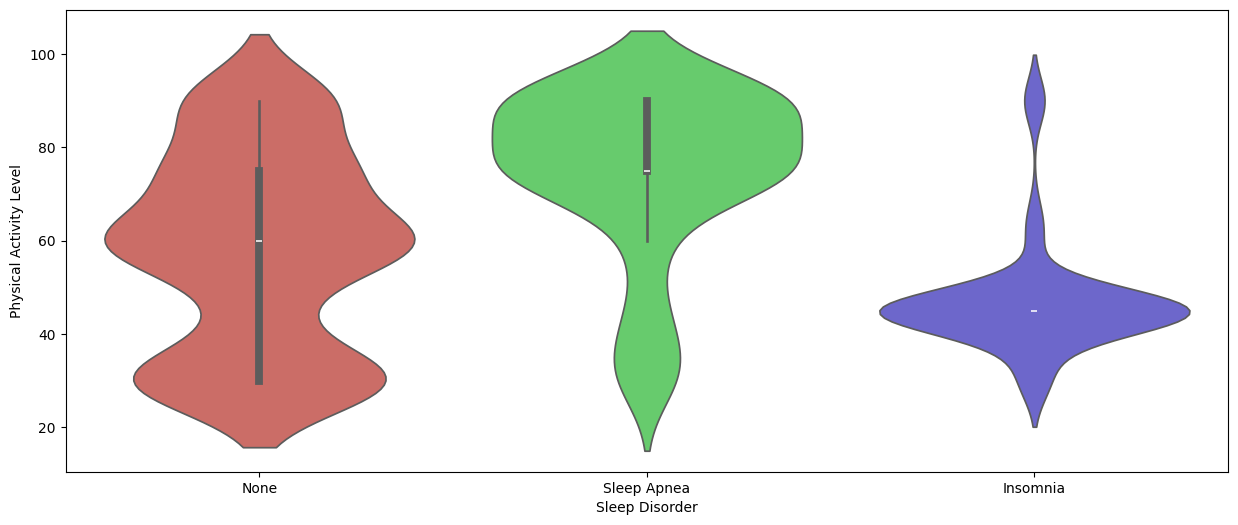

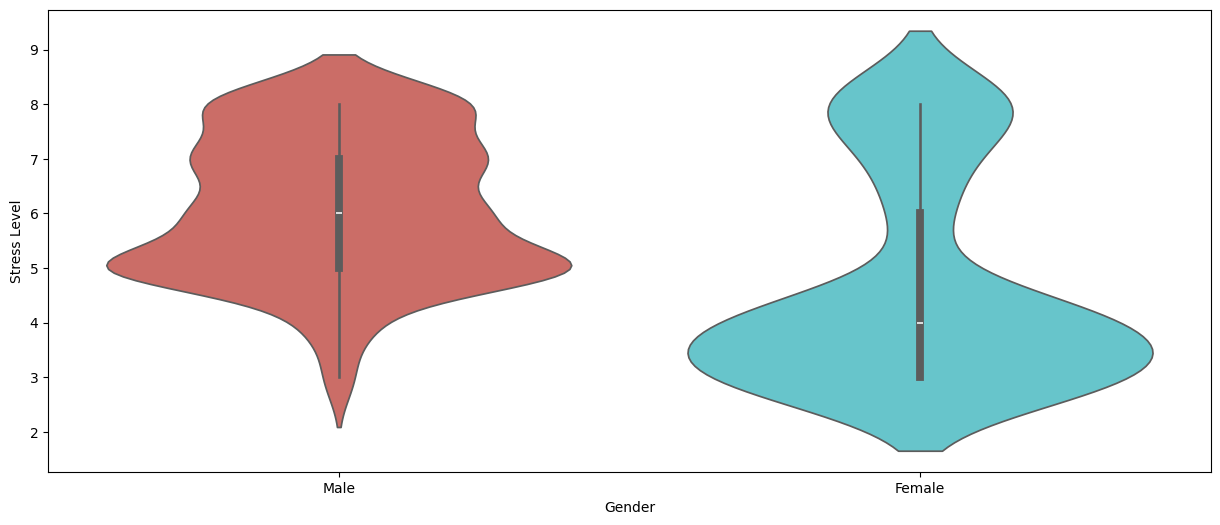

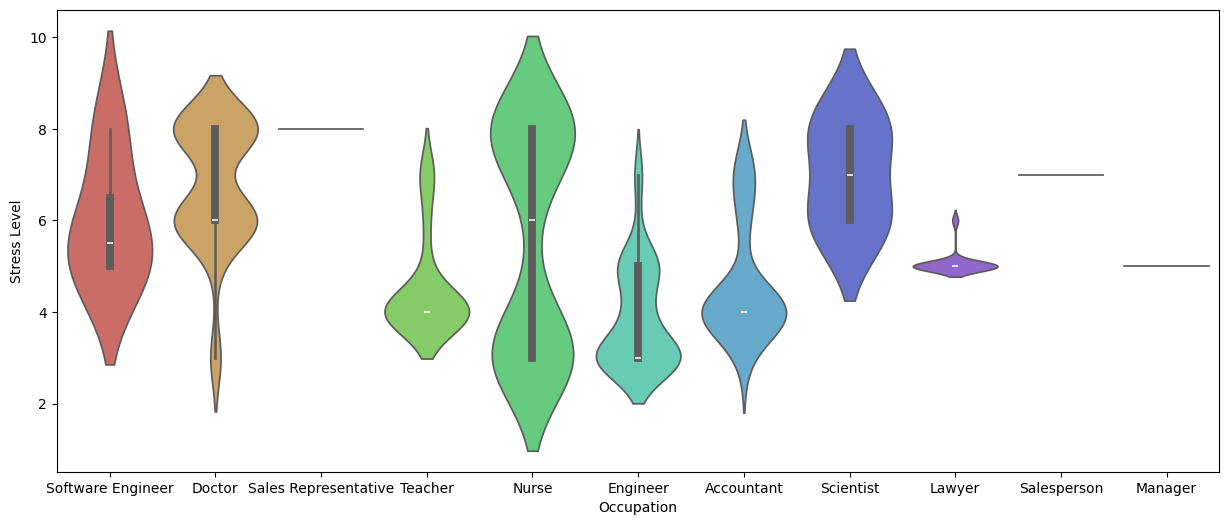

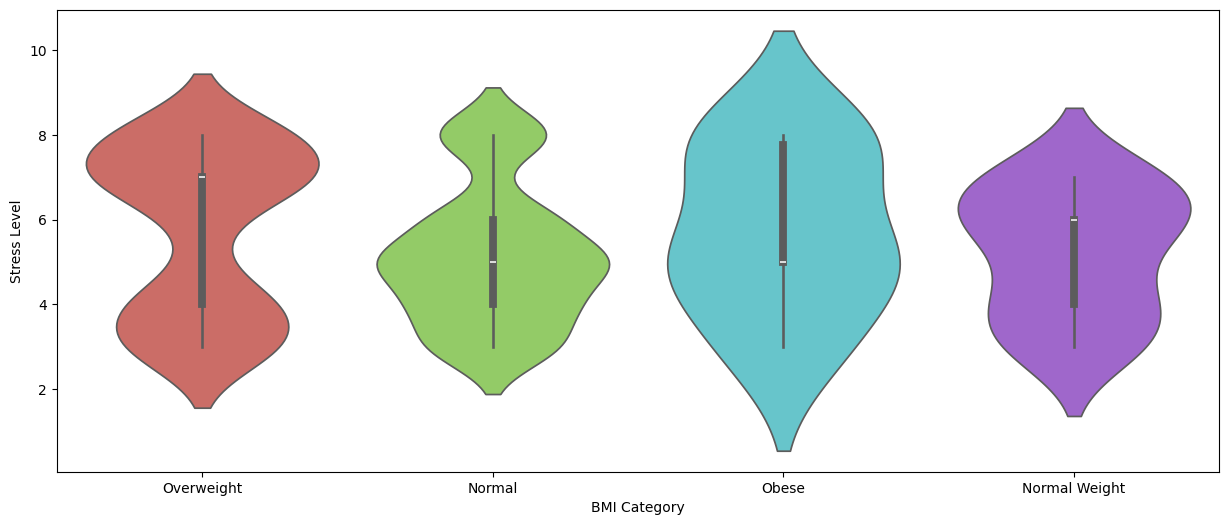

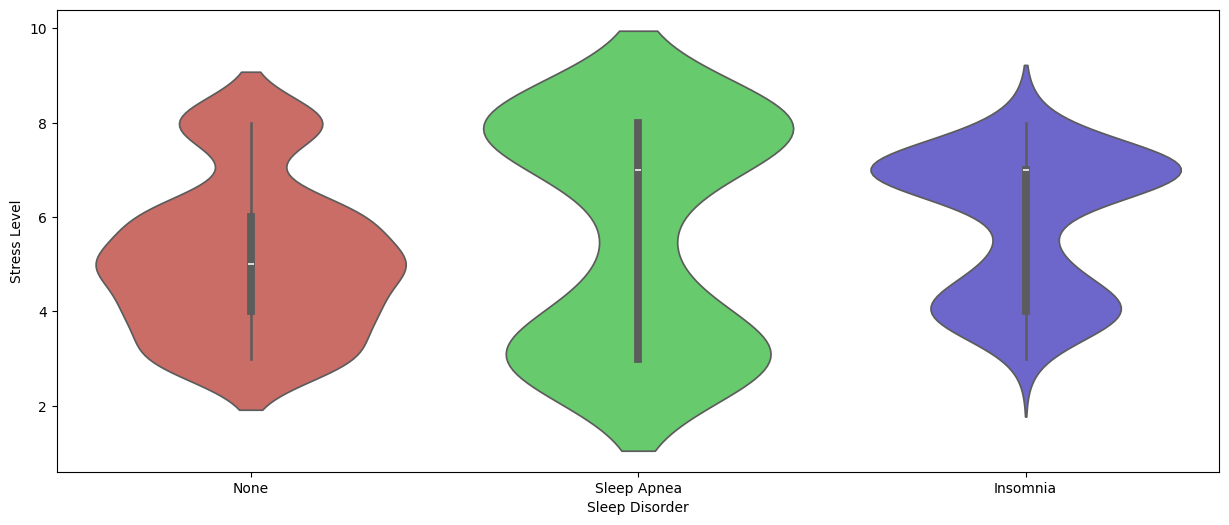

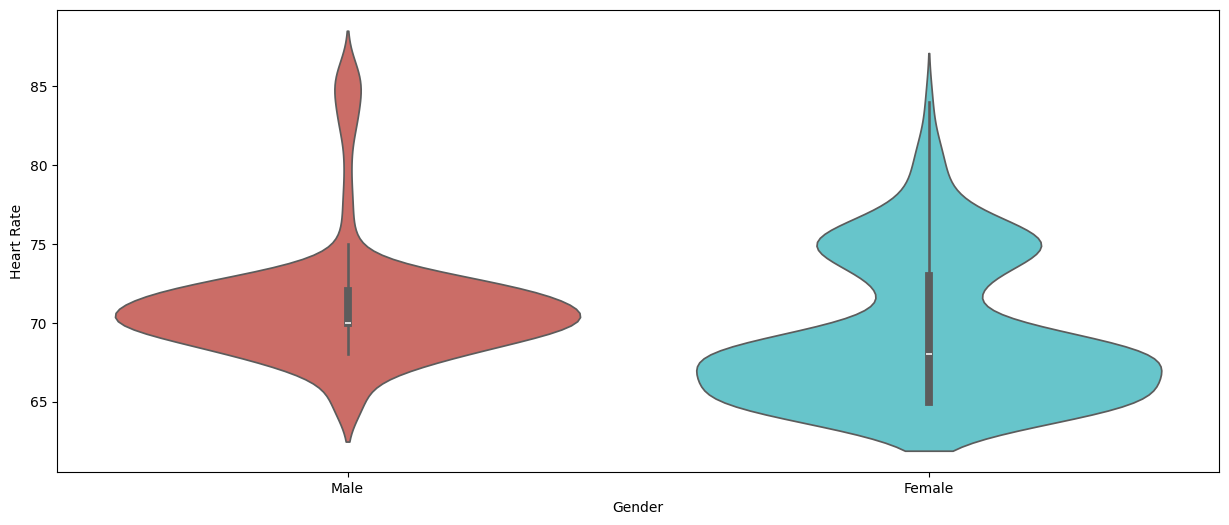

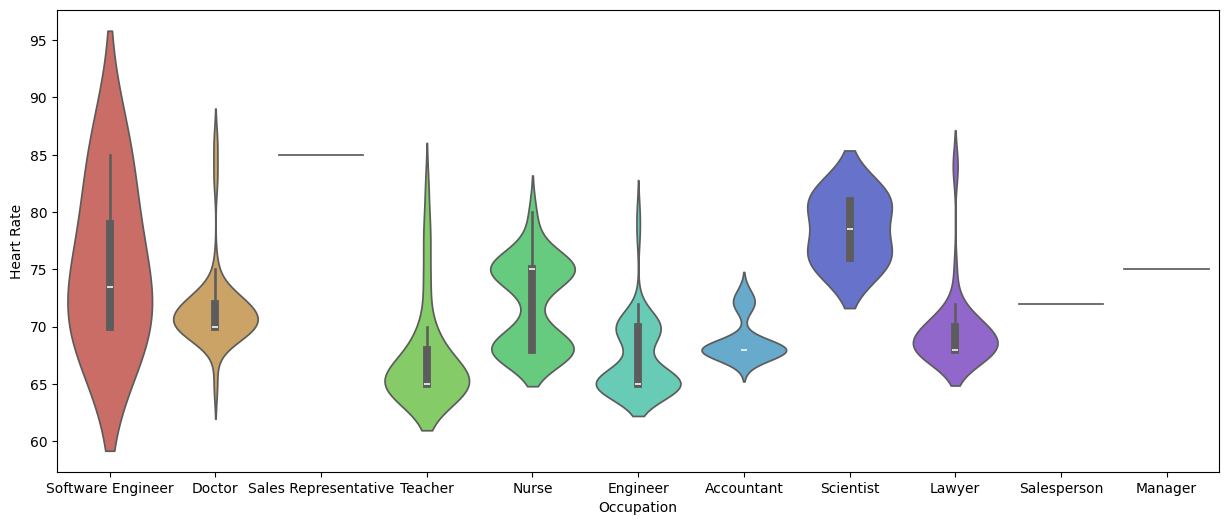

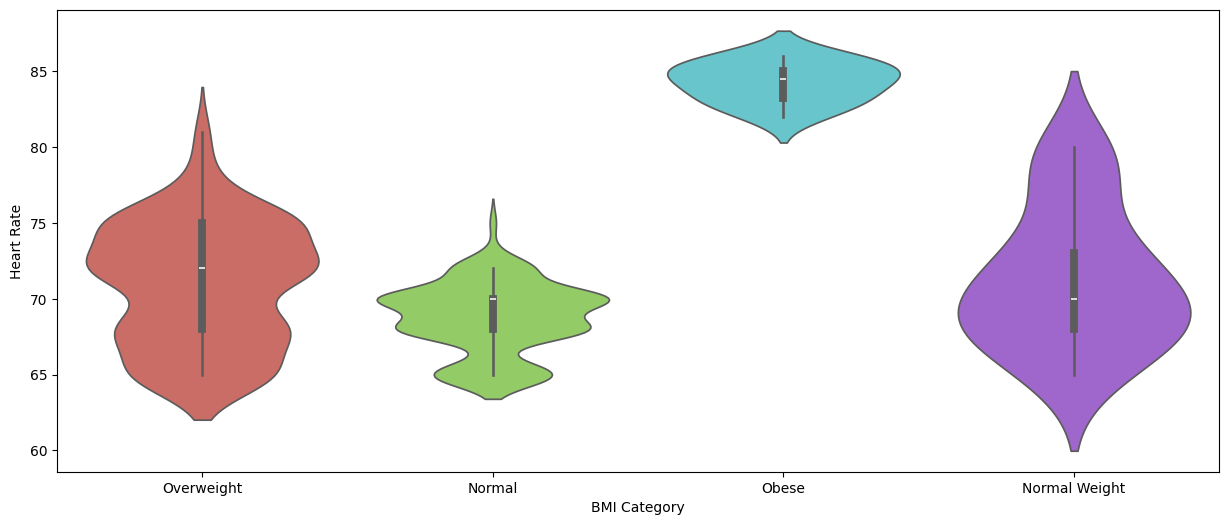

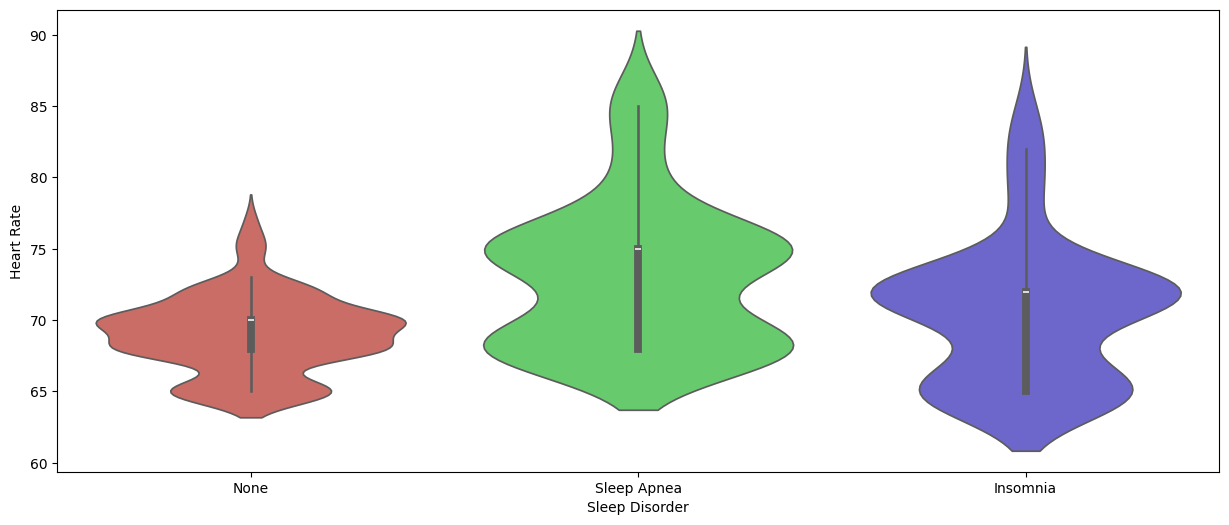

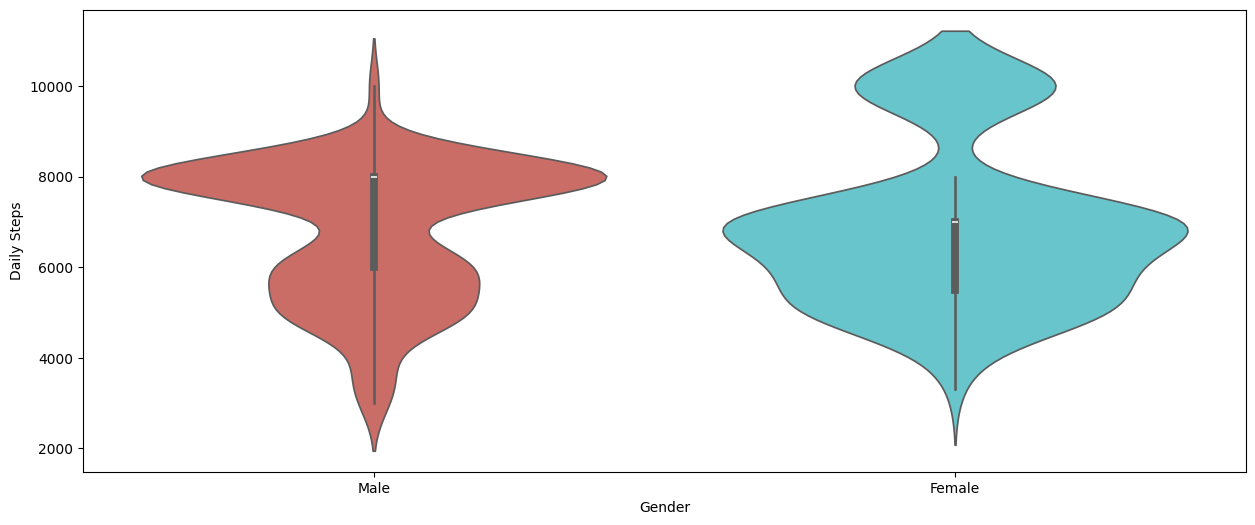

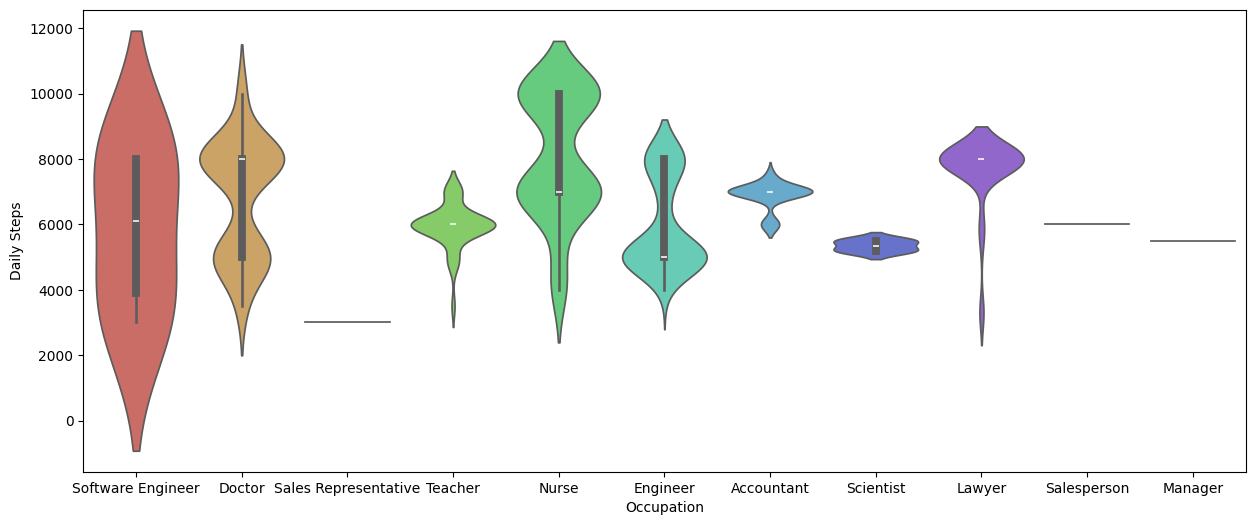

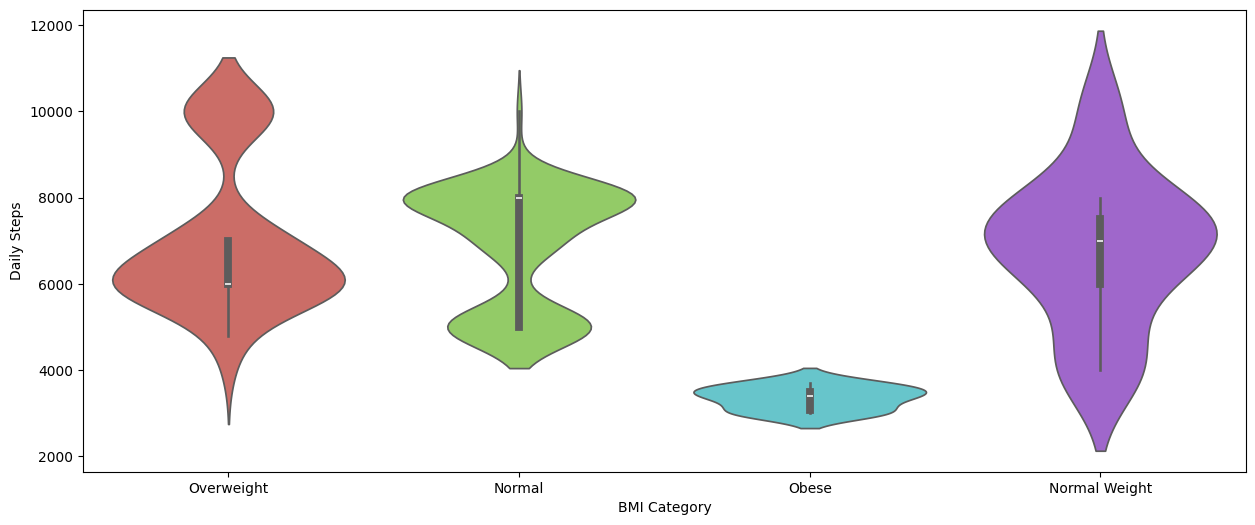

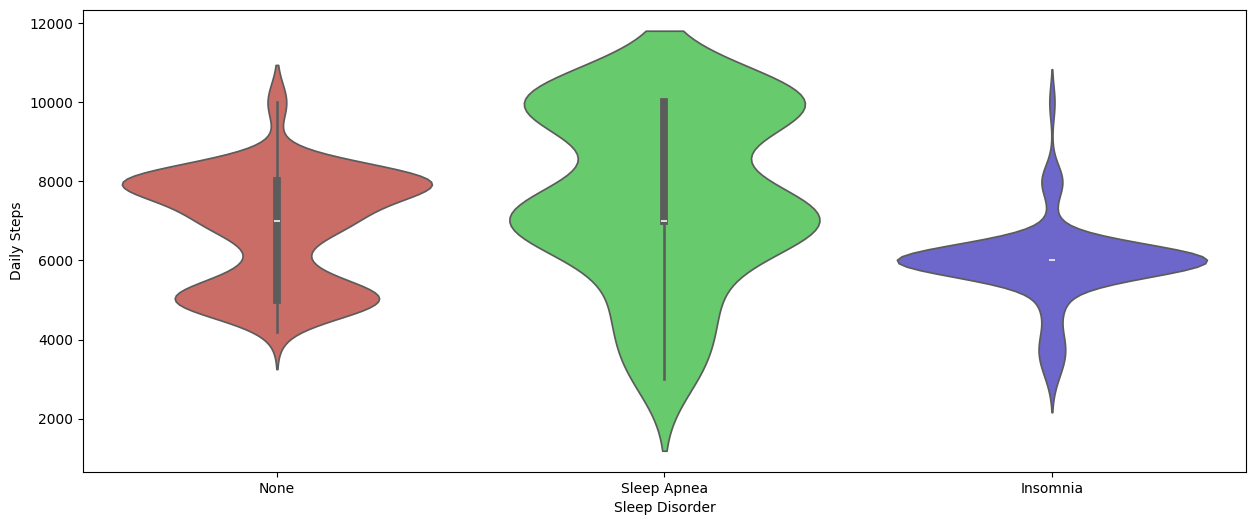

In [44]:
for i in numerical_columns:
    for j in object_columns:
        if i != 'Person ID' and j != 'Blood Pressure':
                plt.figure(figsize=(15,6))
                sns.violinplot(x = df[j], y = df[i], data = df, palette = 'hls')
                plt.show()

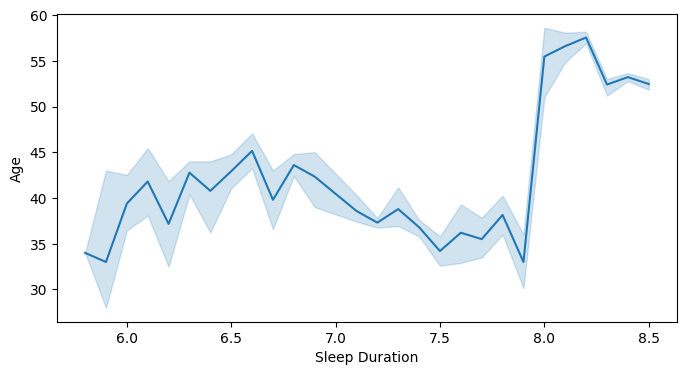

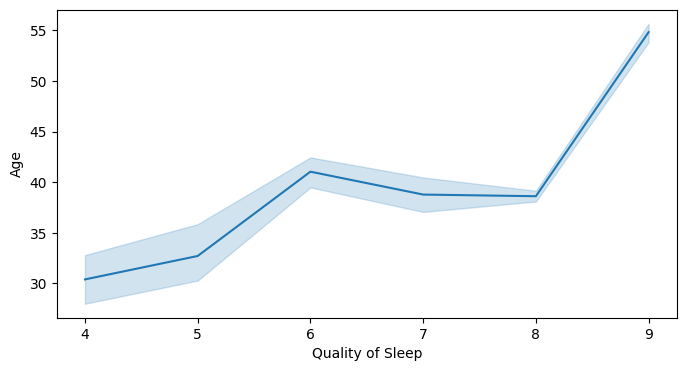

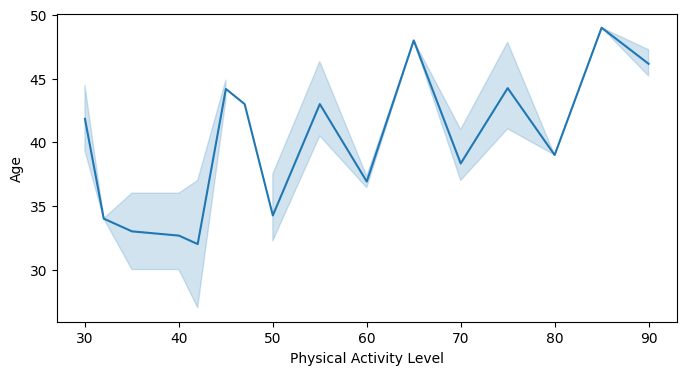

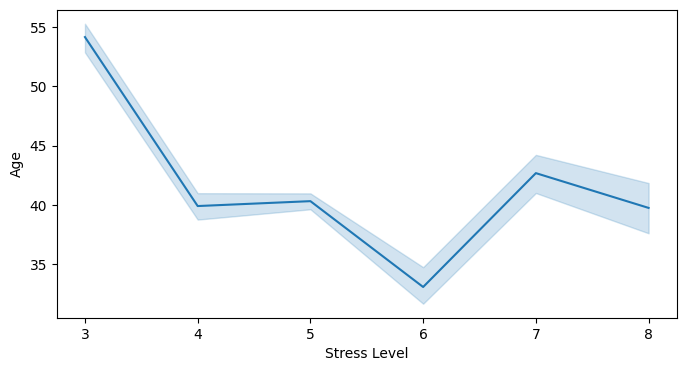

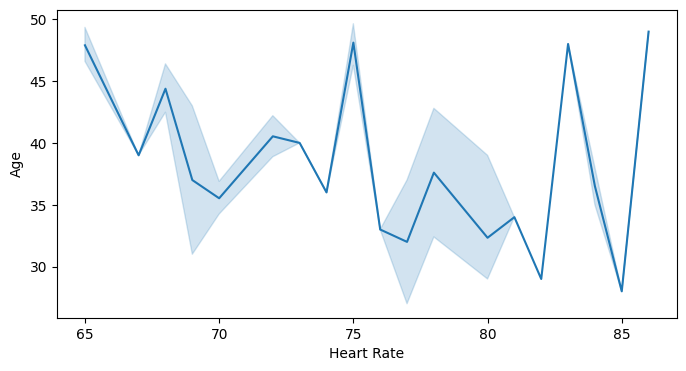

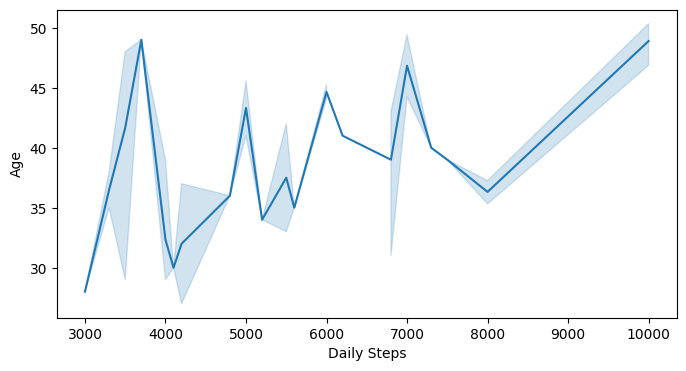

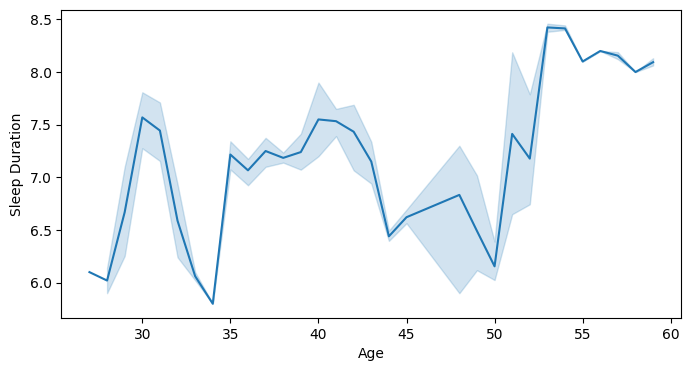

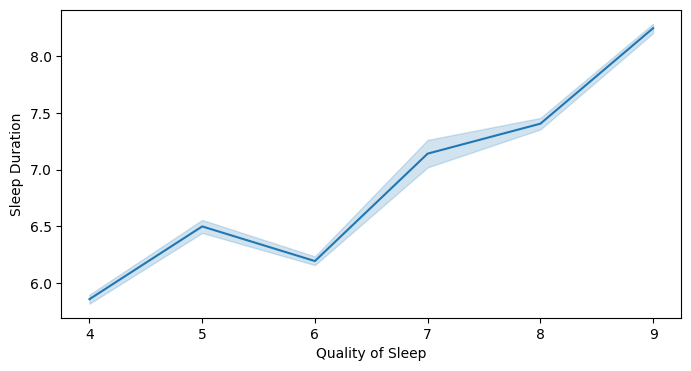

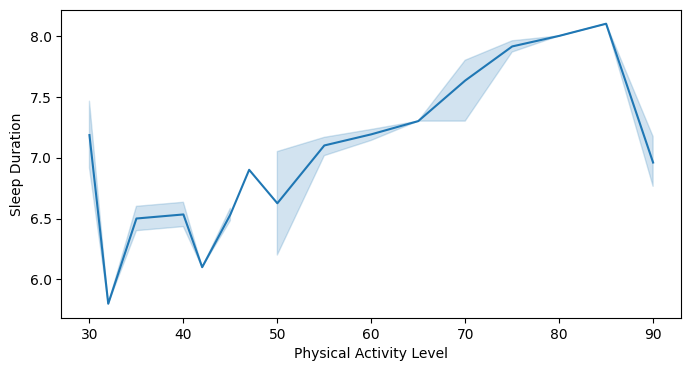

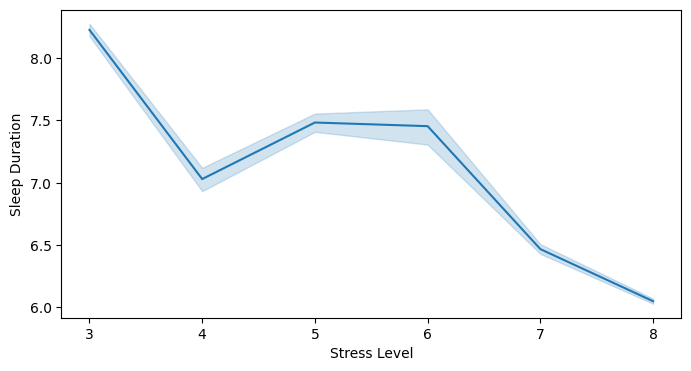

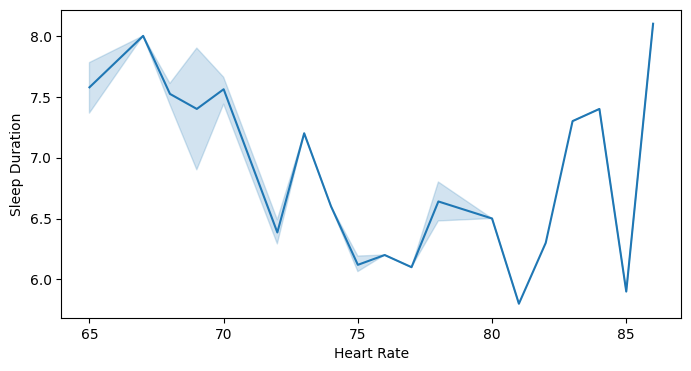

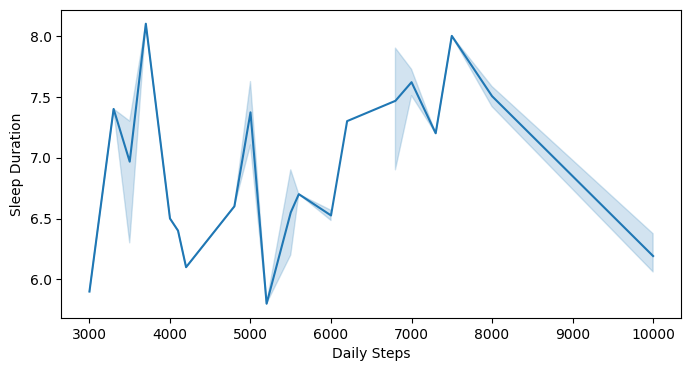

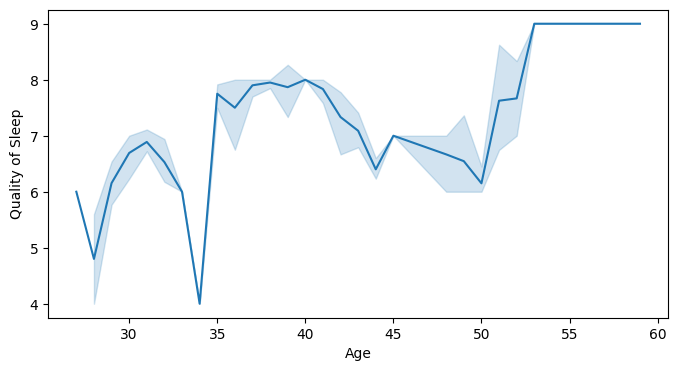

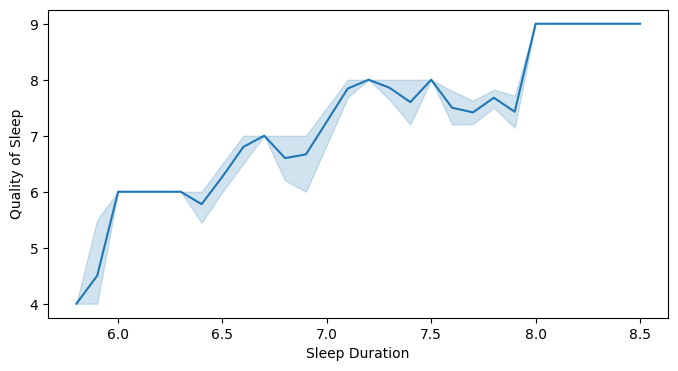

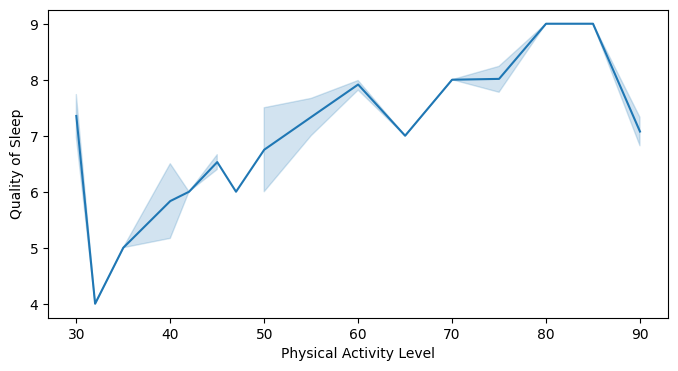

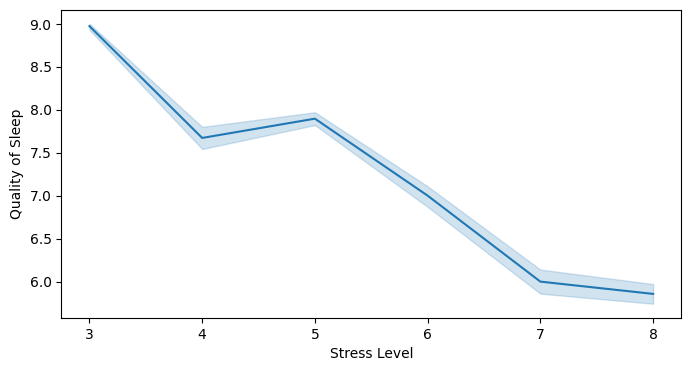

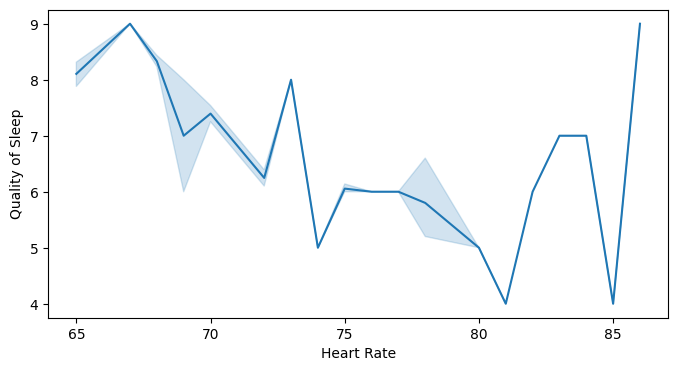

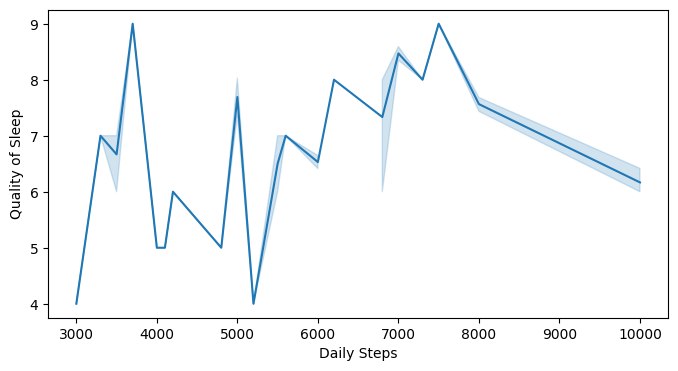

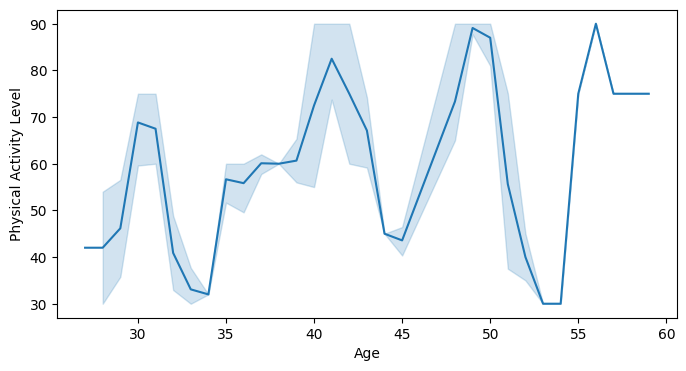

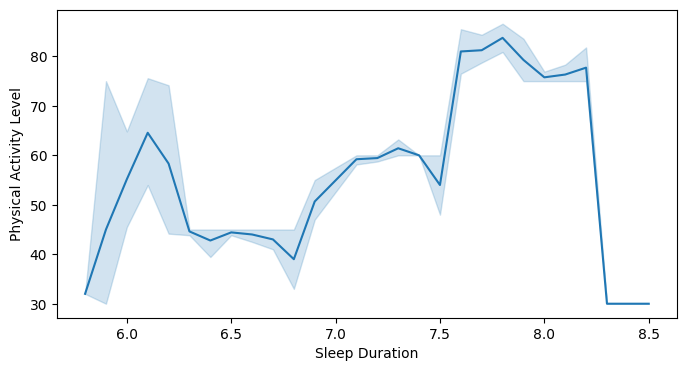

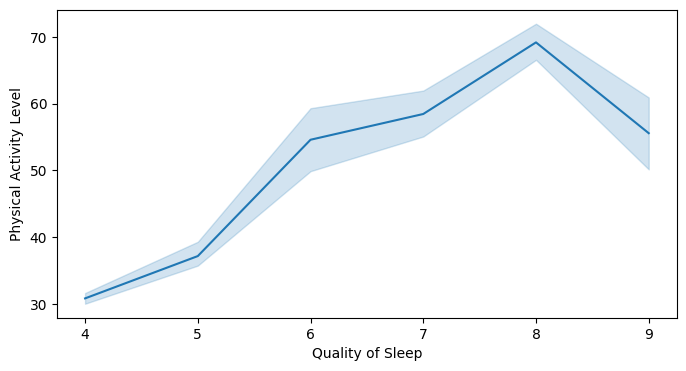

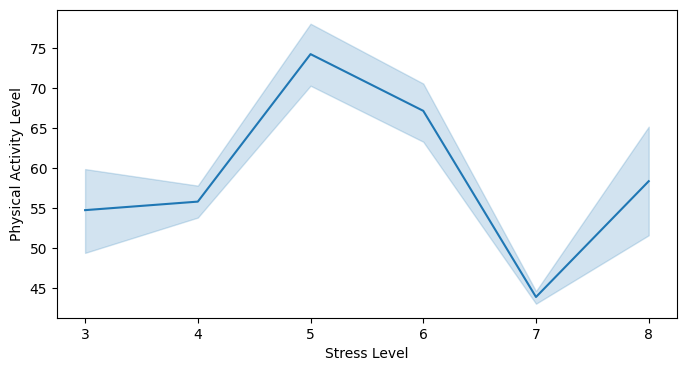

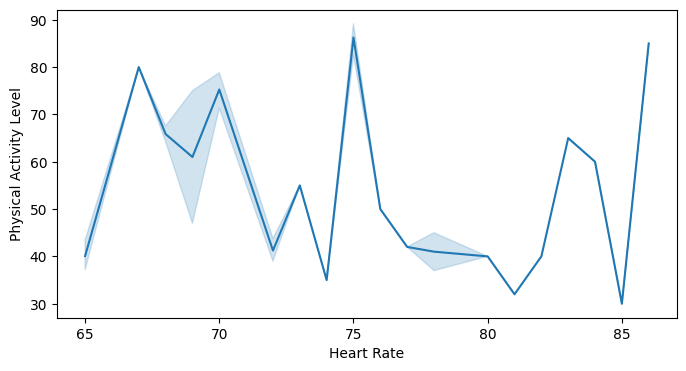

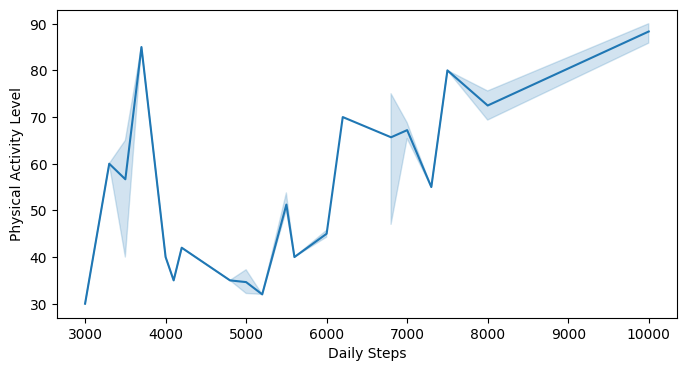

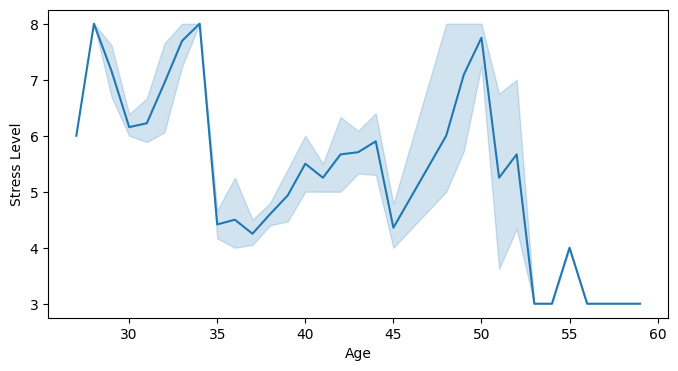

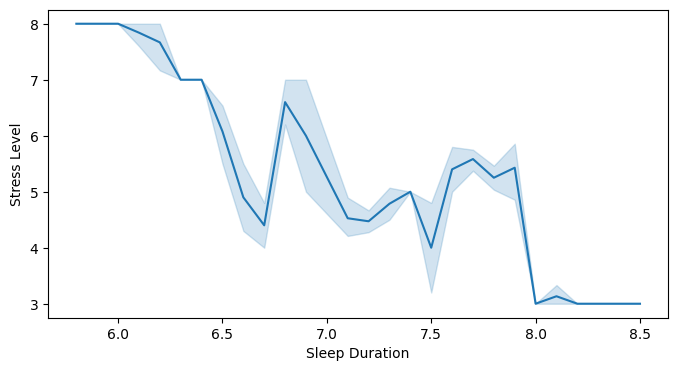

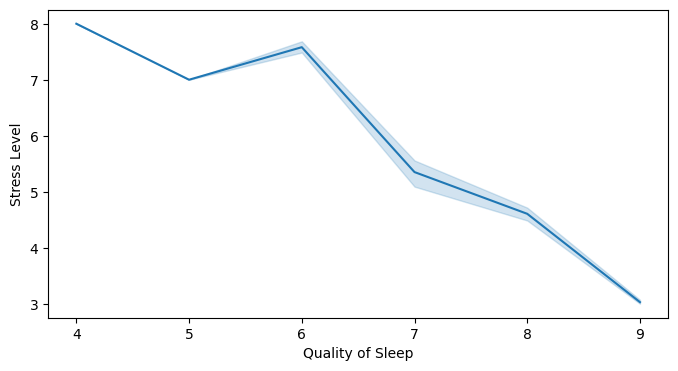

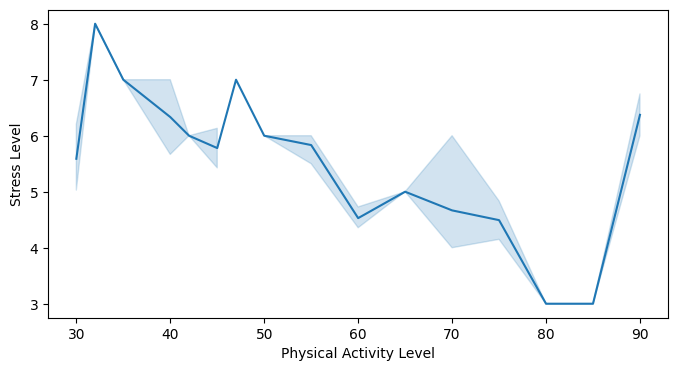

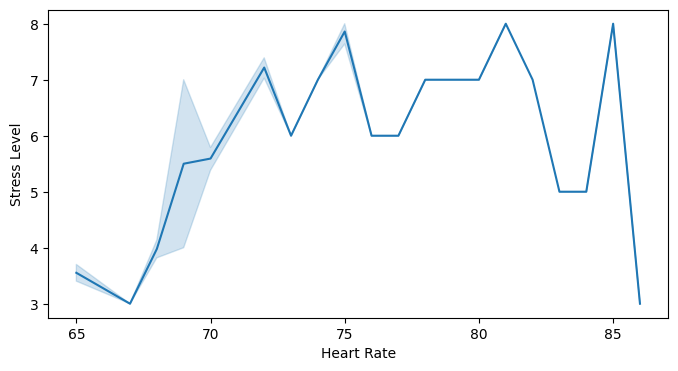

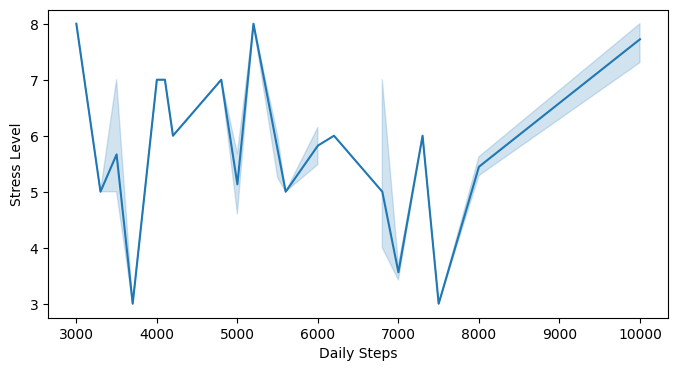

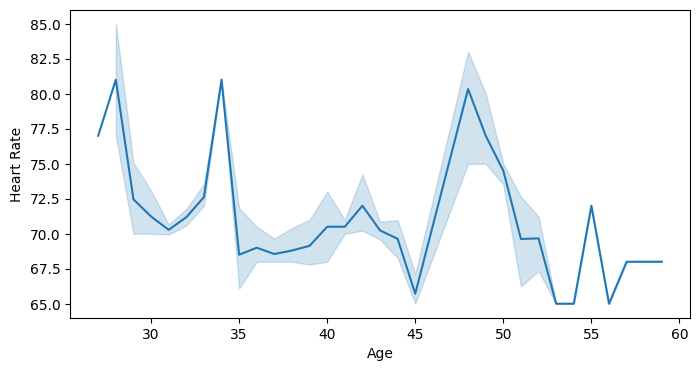

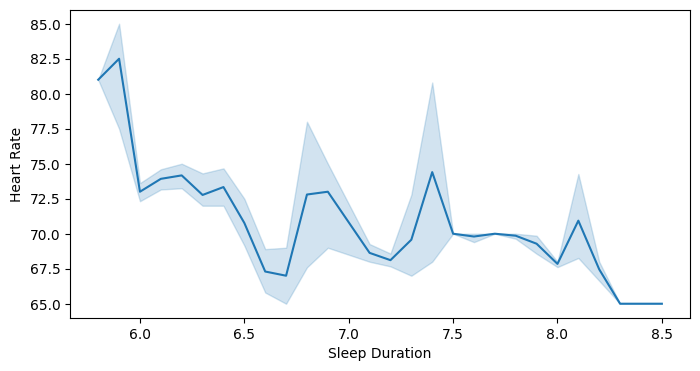

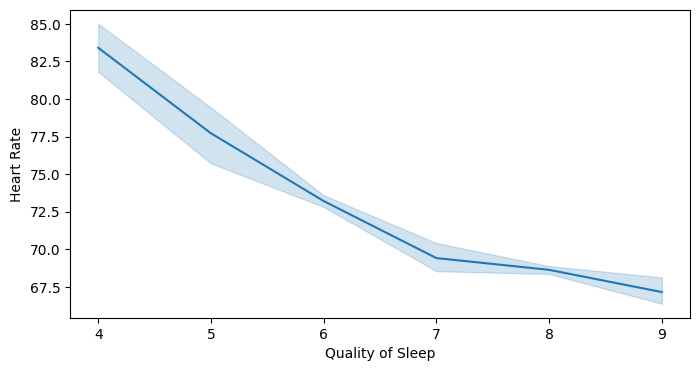

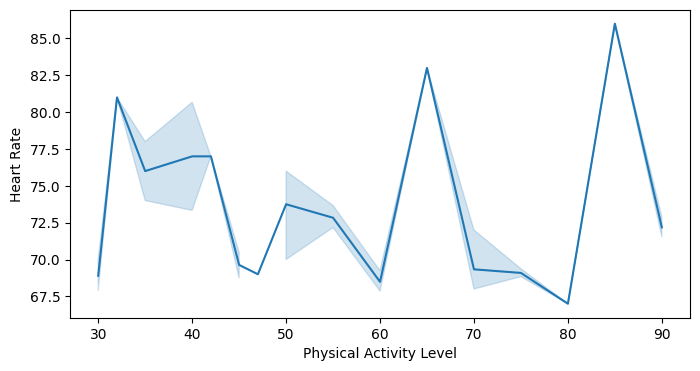

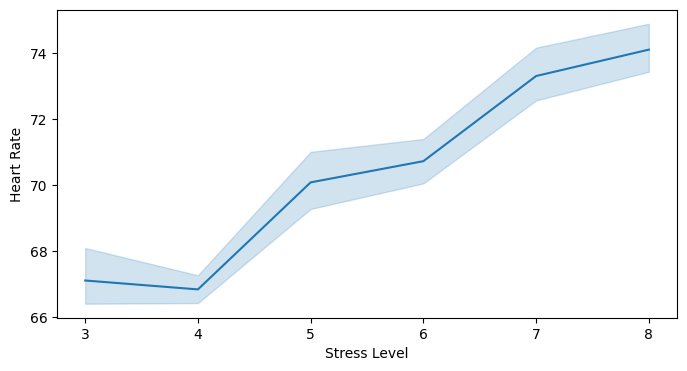

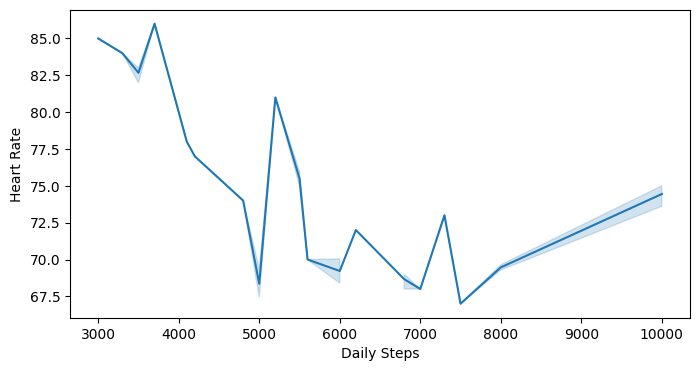

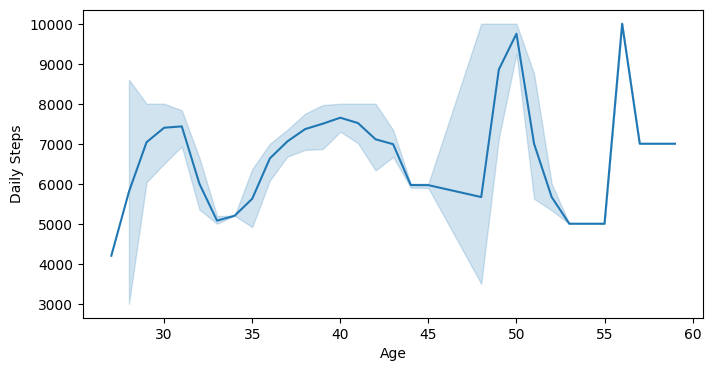

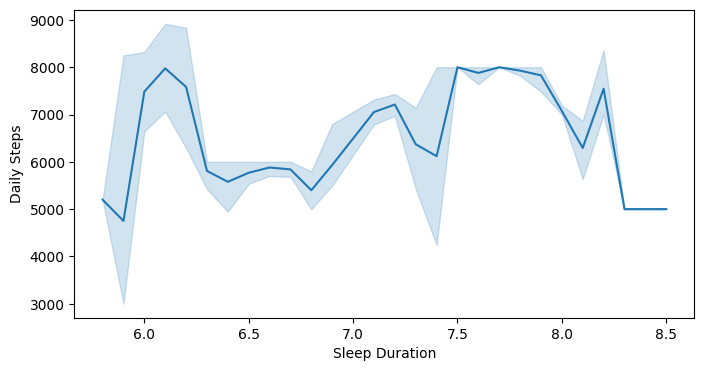

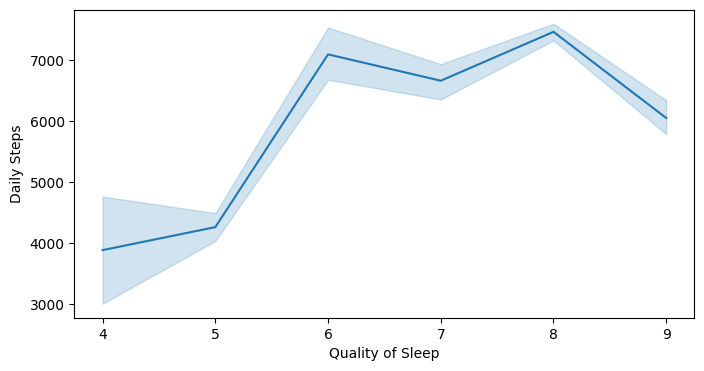

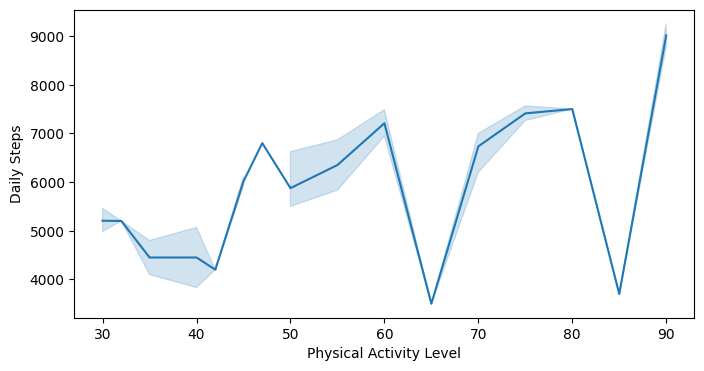

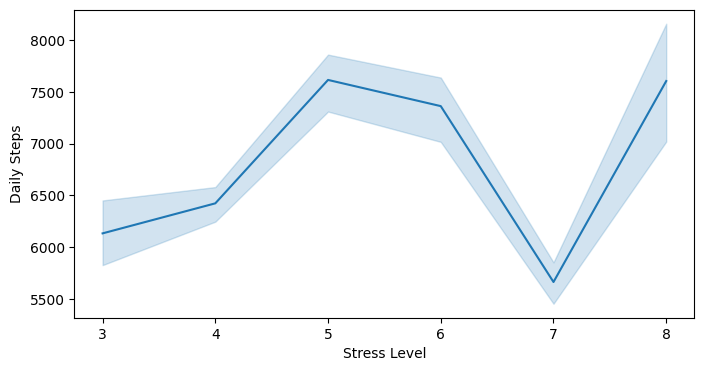

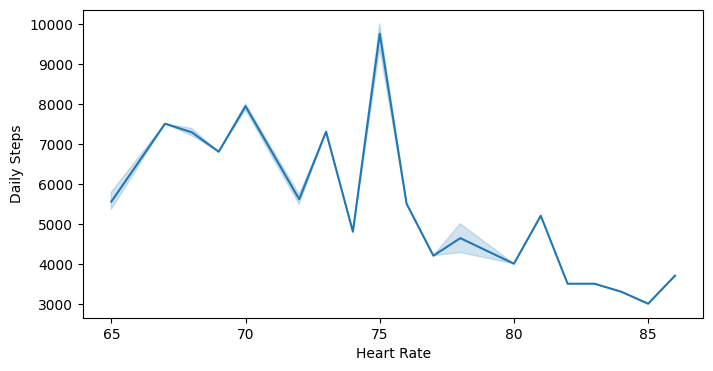

In [45]:
for i in numerical_columns:
    for j in numerical_columns:
        if i != 'Person ID' and j != 'Person ID':
            if i != j:
                plt.figure(figsize=(8,4))
                sns.lineplot(x = df[j], y = df[i], data = df, palette = 'hls')
                plt.show()

In [46]:
# IQR
# Calculate the upper and lower limits
Q1 = df['Heart Rate'].quantile(0.25)
Q3 = df['Heart Rate'].quantile(0.75)
IQR = Q3 - Q1
lower = Q1 - 1.5*IQR
upper = Q3 + 1.5*IQR

upper_array = np.where(df['Heart Rate']>=upper)[0]
df = df.drop(index = upper_array)

In [47]:
df.columns

Index(['Gender', 'Age', 'Occupation', 'Sleep Duration', 'Quality of Sleep',
       'Physical Activity Level', 'Stress Level', 'BMI Category',
       'Blood Pressure', 'Heart Rate', 'Daily Steps', 'Sleep Disorder',
       'Systolic', 'Diastolic'],
      dtype='object')

In [48]:
average_systolic = df['Systolic'].mean()
average_diastolic = df['Diastolic'].mean()
print(f"Average Systolic Pressure: {average_systolic}")
print(f"Average Diastolic Pressure: {average_diastolic}")

Average Systolic Pressure: 128.18926553672316
Average Diastolic Pressure: 84.454802259887


In [49]:
# Create a copy of the DataFrame with only the selected columns
df_selected = df.copy()

In [50]:
df_selected = df_selected.drop(['Blood Pressure',], axis = 1)

In [51]:
# Encode categorical features using one-hot encoding
df_encoded = pd.get_dummies(df_selected, columns=['Gender', 'Occupation', 'BMI Category'], drop_first = True, dtype = int) 

In [52]:
df_encoded.info()

<class 'pandas.core.frame.DataFrame'>
Index: 354 entries, 0 to 373
Data columns (total 22 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Age                           354 non-null    int64  
 1   Sleep Duration                354 non-null    float64
 2   Quality of Sleep              354 non-null    int64  
 3   Physical Activity Level       354 non-null    int64  
 4   Stress Level                  354 non-null    int64  
 5   Heart Rate                    354 non-null    int64  
 6   Daily Steps                   354 non-null    int64  
 7   Sleep Disorder                354 non-null    object 
 8   Systolic                      354 non-null    int32  
 9   Diastolic                     354 non-null    int32  
 10  Gender_Male                   354 non-null    int32  
 11  Occupation_Doctor             354 non-null    int32  
 12  Occupation_Engineer           354 non-null    int32  
 13  Occupation

In [53]:
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
df_encoded['Sleep Disorder'] = label_encoder.fit_transform(df_encoded['Sleep Disorder'])

In [55]:
df_encoded.columns

Index(['Age', 'Sleep Duration', 'Quality of Sleep', 'Physical Activity Level',
       'Stress Level', 'Heart Rate', 'Daily Steps', 'Sleep Disorder',
       'Systolic', 'Diastolic', 'Gender_Male', 'Occupation_Doctor',
       'Occupation_Engineer', 'Occupation_Lawyer', 'Occupation_Manager',
       'Occupation_Nurse', 'Occupation_Salesperson', 'Occupation_Scientist',
       'Occupation_Software Engineer', 'Occupation_Teacher',
       'BMI Category_Normal Weight', 'BMI Category_Overweight'],
      dtype='object')

In [56]:
# Calculate the correlation matrix
correlation_matrix = df_encoded.corr()

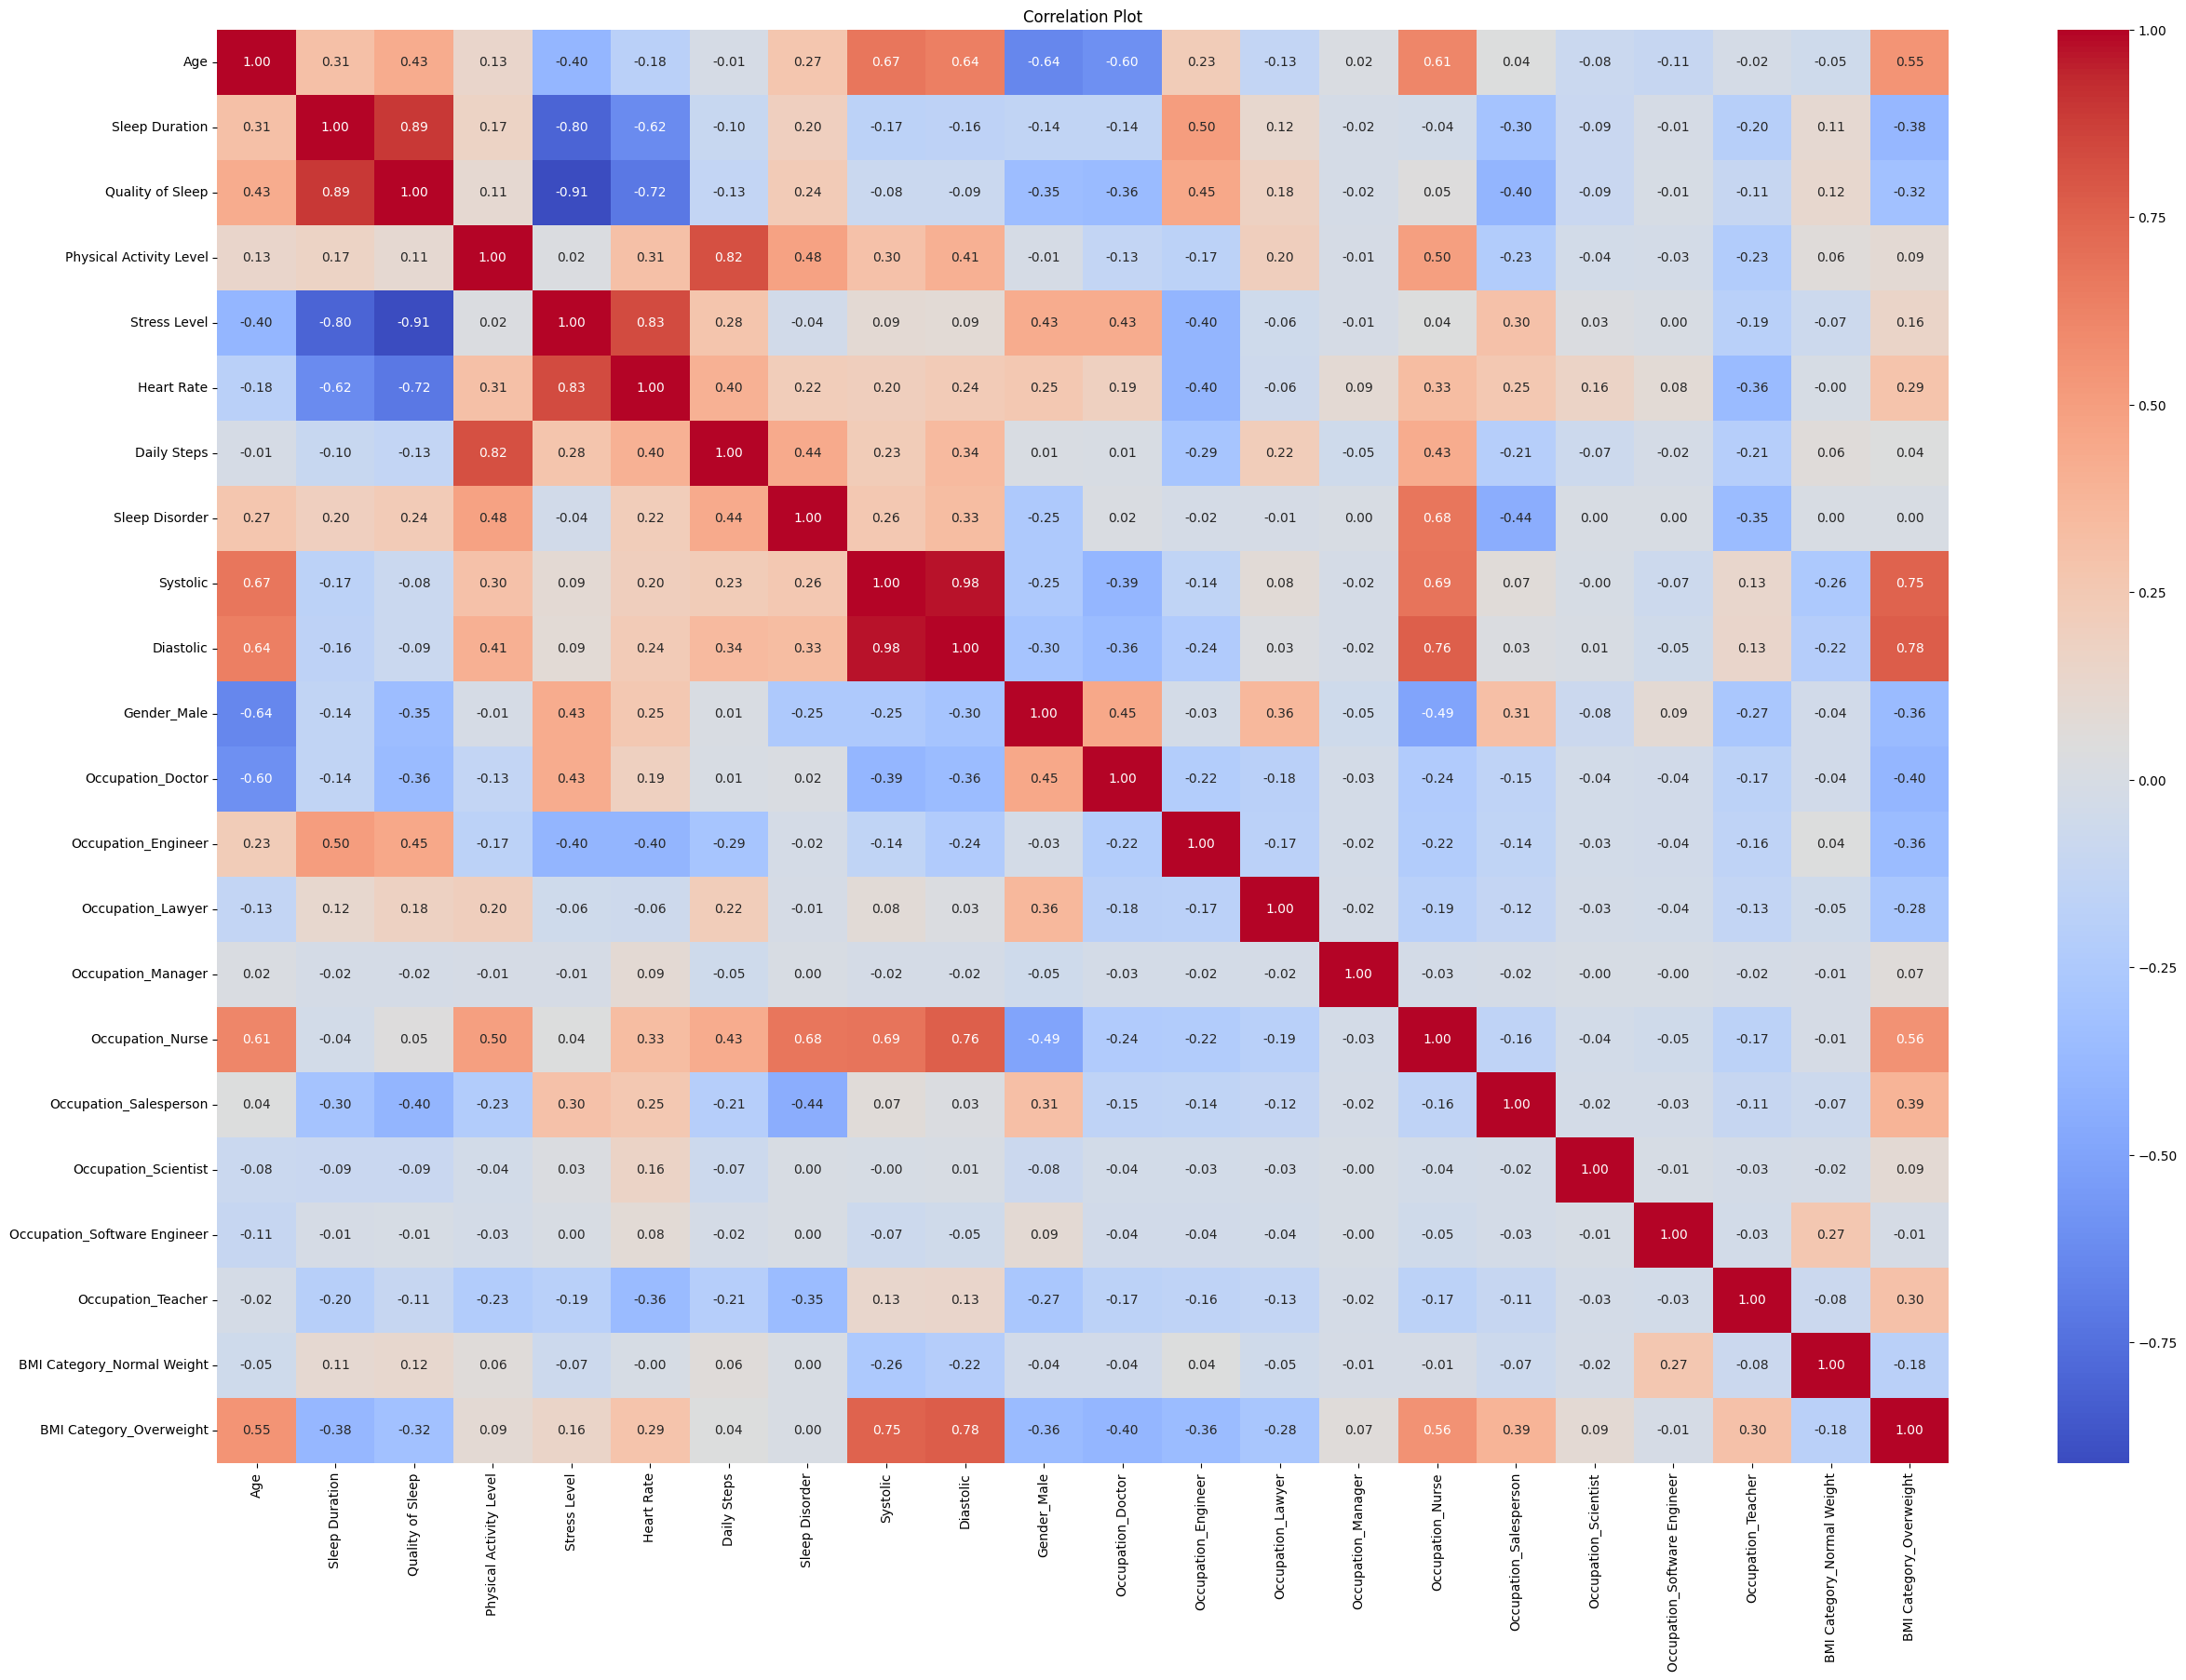

In [57]:
plt.figure(figsize=(30, 20))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Plot')
plt.show()

In [58]:
from sklearn.ensemble import RandomForestClassifier

# Assuming X is the feature matrix and y is the target variable
X = df_encoded.drop('Sleep Disorder', axis=1) # Drop the target variable from the featu
y = df_encoded['Sleep Disorder']

# Create a random forest classifier
clf = RandomForestClassifier()

# Fit the classifier to the data
clf.fit(X, y)

# Get feature importance scores
feature_importance = clf.feature_importances_

# Create a DataFrame to display feature importance scores
feature_importance_df = pd.DataFrame({'Feature': X.columns, 'Importance': feature_importance})
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

# Print the feature importance scores
print(feature_importance_df)

                         Feature  Importance
20       BMI Category_Overweight    0.165584
7                       Systolic    0.158878
1                 Sleep Duration    0.142149
8                      Diastolic    0.116876
14              Occupation_Nurse    0.108713
0                            Age    0.080946
6                    Daily Steps    0.044138
3        Physical Activity Level    0.041321
4                   Stress Level    0.034551
15        Occupation_Salesperson    0.026665
5                     Heart Rate    0.024277
2               Quality of Sleep    0.016043
18            Occupation_Teacher    0.015127
10             Occupation_Doctor    0.009560
11           Occupation_Engineer    0.008683
9                    Gender_Male    0.003578
12             Occupation_Lawyer    0.001208
19    BMI Category_Normal Weight    0.001083
17  Occupation_Software Engineer    0.000264
16          Occupation_Scientist    0.000246
13            Occupation_Manager    0.000110


In [59]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report

In [60]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [61]:
logreg = LogisticRegression()

In [62]:
logreg.fit(X_train, y_train)

LogisticRegression()

In [63]:
y_pred = logreg.predict(X_test)

In [64]:
report = classification_report(y_test, y_pred)
print("Classification Report:")
print(report)

Classification Report:
              precision    recall  f1-score   support

           0       0.70      0.44      0.54        16
           1       0.77      0.90      0.83        41
           2       0.92      0.86      0.89        14

    accuracy                           0.79        71
   macro avg       0.80      0.73      0.75        71
weighted avg       0.78      0.79      0.78        71



In [65]:
from sklearn.tree import DecisionTreeClassifier

In [66]:
dt = DecisionTreeClassifier()

In [67]:
dt.fit(X_train, y_train)

DecisionTreeClassifier()

In [68]:
y_pred = dt.predict(X_test)

In [69]:
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.9577464788732394


In [70]:
report = classification_report(y_test, y_pred)
print("Classification Report:")
print(report)

Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.94      0.97        16
           1       0.98      0.98      0.98        41
           2       0.87      0.93      0.90        14

    accuracy                           0.96        71
   macro avg       0.95      0.95      0.95        71
weighted avg       0.96      0.96      0.96        71



In [74]:
import xgboost as xgb


In [75]:
xgb_model = xgb.XGBClassifier()

In [76]:
xgb_model.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              feature_weights=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=None, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=None,
              n_jobs=None, num_parallel_tree=None, ...)

In [77]:
y_pred = xgb_model.predict(X_test)

In [78]:
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.9577464788732394


In [79]:
report = classification_report(y_test, y_pred)
print("Classification Report:")
print(report)

Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.94      0.97        16
           1       0.98      0.98      0.98        41
           2       0.87      0.93      0.90        14

    accuracy                           0.96        71
   macro avg       0.95      0.95      0.95        71
weighted avg       0.96      0.96      0.96        71

